# KB-Bridge: Intelligent Knowledge Base Search with MCP

**KB-Bridge** is a Model Context Protocol (MCP) server that provides intelligent search and retrieval capabilities for knowledge bases. It supports multiple backend providers (like Dify) and offers advanced features like semantic search, query rewriting, and automatic answer quality evaluation.

**Use Case**: KB-Bridge is ideal for contract analysis (e.g., [ContractNLI](https://stanfordnlp.github.io/contract-nli/)), document Q&A, and knowledge base search.

## What You'll Learn

- Real-world examples from ContractNLI dataset
- Query knowledge bases with natural language
- Custom instructions and query rewriting
- File discovery and document filtering

## Prerequisites

Before running this notebook:

1. **Install KB-Bridge**: `pip install kbbridge`
2. **Install FastMCP**: `pip install fastmcp` (required for MCP client)
3. **Configure credentials**: Create a `.env` file with your backend credentials (see [README](https://github.com/egpivo/kb-bridge) for details)
4. **Start the server**: 
   - **Option A (Recommended)**: Use the server utilities in the next cell - just run `start_server()` or `ensure_server_running()`
   - **Option B**: Start manually: `python -m kbbridge.server --host 0.0.0.0 --port 5566`

## Quick Links

- [PyPI Package](https://pypi.org/project/kbbridge/)
- [GitHub Repository](https://github.com/egpivo/kb-bridge)
- [ContractNLI Dataset](https://stanfordnlp.github.io/contract-nli/)


In [8]:
# Import server management utilities
import sys
from pathlib import Path

# Add examples directory to path
cwd = Path.cwd()
if (cwd / 'examples' / 'utils.py').exists():
    sys.path.insert(0, str(cwd / 'examples'))
elif (cwd.parent / 'examples' / 'utils.py').exists():
    sys.path.insert(0, str(cwd.parent / 'examples'))

try:
    from utils import start_server, stop_server, show_logs, check_server_status, logs
    
    def ensure_server_running(port=5566):
        """Start server if not running"""
        if not check_server_status():
            start_server(port=port, kill_existing=True)
        else:
            print("Server already running")
    
    print("✓ Server utilities loaded")
    print("Use: start_server(port=5566) or ensure_server_running()")
except ImportError:
    print("⚠ Utils not available. Start server manually: python -m kbbridge.server --port 5566")


✓ Server utilities loaded
Use: start_server(port=5566) or ensure_server_running()


## Server Management

Start the server before running examples:

- `start_server(port=5566)` - Start server
- `ensure_server_running()` - Auto-start if needed
- `show_logs()` - View logs


In [9]:
# Start server if not running
ensure_server_running(port=5566)


✓ Server is running (PID: 2568205)
Server already running


In [10]:
show_logs()


Server Logs (50 of 1000 lines)

ℹ️  2025-11-14 11:33:03,109 - kbbridge.services.assistant_service - INFO - Candidate 6 [advanced]: 2,693 chars
ℹ️  2025-11-14 11:33:03,109 - kbbridge.services.assistant_service - INFO - Candidate 7 [advanced]: 1,022 chars
ℹ️  2025-11-14 11:33:03,109 - kbbridge.services.assistant_service - INFO - Candidate 8 [advanced]: 1,002 chars
ℹ️  2025-11-14 11:33:03,109 - kbbridge.services.assistant_service - INFO - Candidate 9 [advanced]: 948 chars
ℹ️  2025-11-14 11:33:03,109 - kbbridge.services.assistant_service - INFO - Candidate 10 [advanced]: 1,566 chars
ℹ️  2025-11-14 11:33:03,109 - kbbridge.services.assistant_service - INFO - Candidate 11 [advanced]: 2,529 chars
ℹ️  2025-11-14 11:33:03,109 - kbbridge.services.assistant_service - INFO - Candidate 12 [advanced]: 865 chars
ℹ️  2025-11-14 11:33:03,109 - kbbridge.services.assistant_service - INFO - Candidate 13 [advanced]: 1,309 chars
ℹ️  2025-11-14 11:33:03,109 - kbbridge.services.assistant_service - INFO - Cand

In [11]:
# Import MCP client and required libraries
import sys
from pathlib import Path
import json

# Add examples directory to path to import mcp_client
cwd = Path.cwd()
if (cwd / 'examples' / 'mcp_client.py').exists():
    sys.path.insert(0, str(cwd / 'examples'))
elif (cwd.parent / 'examples' / 'mcp_client.py').exists():
    sys.path.insert(0, str(cwd.parent / 'examples'))

try:
    from mcp_client import ClientSession
    print("✓ MCP Client loaded")
except ImportError:
    print("⚠ mcp_client.py not found. Install httpx: pip install httpx")
    raise

# Server configuration
SERVER_URL = "http://localhost:5566/mcp"
RESOURCE_ID = "bfa61dd2-3514-4768-9014-e30eecdaf00f"  # Replace with your actual resource ID

print(f"✓ Server URL: {SERVER_URL}")
print(f"✓ Resource ID: {RESOURCE_ID} (update this with your actual resource ID)")


✓ MCP Client loaded
✓ Server URL: http://localhost:5566/mcp
✓ Resource ID: bfa61dd2-3514-4768-9014-e30eecdaf00f (update this with your actual resource ID)


## Real-World Examples: ContractNLI Dataset

Examples from the [ContractNLI dataset](https://stanfordnlp.github.io/contract-nli/) demonstrating legal document analysis.

**Note**: Update `RESOURCE_ID` in the cell above with your actual knowledge base ID.


### Example 1: Non-Compete Clause

Query with custom instructions to extract specific legal terms.


In [12]:
async def example_non_compete_clause():
    """Query about non-compete clause restrictions"""
    query = "Does the agreement include a non-compete clause restricting the employee from joining competitors?"
    
    custom_instructions = """
    Extract: time periods (e.g., "12 months"), geographic scope (e.g., "50-mile radius"), 
    scope of restriction, and any exceptions. Cite exact text from the document.
    """
    
    async with ClientSession(SERVER_URL) as session:
        result = await session.call_tool("assistant", {
            "resource_id": RESOURCE_ID,
            "query": query,
            "custom_instructions": custom_instructions
        })
        
        response_data = json.loads(result.content[0].text)
        
        if "answer" in response_data:
            print("Answer:", response_data["answer"])
            if "sources" in response_data:
                print(f"\nSources ({len(response_data['sources'])}):")
                for source in response_data["sources"][:3]:
                    print(f"  - {source.get('title', 'Unknown')} (score: {source.get('score', 0):.3f})")
        else:
            print("Error:", response_data.get("error", "Unknown error"))

await example_non_compete_clause()


[11/14/25 11:37:36] INFO     Server log: Executing assistant for query: Does the agreement include a  ]8;id=221400;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=693195;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             non-compete clause restricting the employee from joining competitors?                 

                    INFO     Server log: Using custom instructions:                                   ]8;id=646329;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=904883;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                                 Extract: time periods (e.g., "12 months"), geographic scope (e.g.,                
                             "50-mile radius"),                                                                    
                                 scope of restriction, and any exceptions. Cite exact text from the                
                             document.                                                                             
                                                                                                                   

                    INFO     Server log: Request timeout set to: 300 seconds                          ]8;id=317168;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=780105;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Calling assistant_service...                                 ]8;id=580046;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=884157;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Starting assistant session 950eb53a with query: 'Does the    ]8;id=118236;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=646967;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             agreement include a non-compete clause restricting the employee from                  
                             joining competitors?'                                                                 

                    INFO     Server log: Resource ID: bfa61dd2-3514-4768-9014-e30eecdaf00f            ]8;id=228900;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=731896;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Verbose mode: False                                          ]8;id=472913;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=966664;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Retrieval backend: dify                                      ]8;id=819119;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=19028;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Credentials status: http***t.ai, data***Mrjl,                ]8;id=838511;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=597796;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             llm_api_url=SET, llm_model=SET                                                        

                    INFO     Server log: All required credentials are present and validated           ]8;id=817248;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=151172;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Creating components...                                       ]8;id=749854;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=191576;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Components created: ['retriever_factory',                    ]8;id=352055;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=725016;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             'file_discover_factory', 'answer_extractor', 'intention_extractor']                   

                    INFO     Server log: Extracting intention for query: 'Does the agreement include  ]8;id=808178;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=243339;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             a non-compete clause restricting the employee from joining competitors?'              

                    INFO     Server log: Starting intention extraction for query: 'Does the agreement ]8;id=69829;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=229605;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             include a non-compete clause restricting the employee from joining                    
                             competitors?'                                                                         

                    INFO     Server log: Intention extraction result: {'original_query': 'Does the    ]8;id=951156;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=980310;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             agreement include a non-compete clause restricting the employee from                  
                             joining competitors?', 'doc_names': [], 'model_used': 'gpt-4o',                       
                             'tool_type': 'user_intention_extractor', 'success': True,                             
                             'updated_query': 'Does the agreement include a non-compete clause                     
                             restricting the employee from joining competitors?', 'should_decompose':              
                             False, 'sub_queries': [], 'debug_details': ['DSPy processing                          
                             successful']}                                                                         

                    INFO     Server log: Query unchanged: 'Does the agreement include a non-compete   ]8;id=808660;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=498786;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             clause restricting the employee from joining competitors?'                            

                    INFO     Server log: Refined query: 'Does the agreement include a non-compete     ]8;id=974339;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=675602;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             clause restricting the employee from joining competitors?'                            

                    INFO     Server log: Processing 1 dataset pairs...                                ]8;id=443553;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=841712;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

[11/14/25 11:38:00] INFO     Server log: Using custom instructions:                                   ]8;id=662017;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=420226;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                                 Extract: time periods (e.g., "12 months"), geographic scope (e.g.,                
                             "50-mile radius"),                                                                    
                                 scope of restriction, and any exceptions. Cite exact text from the                
                             document.                                                                             
                                                                                                                   

                    INFO     Server log: Content Booster: ENABLED (max_boost_keywords=1)              ]8;id=232847;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=943281;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Dataset processing completed. Found 12 candidates            ]8;id=377089;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=186607;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Sample candidate: {'source': 'advanced', 'resource_id':      ]8;id=441117;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=261184;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             'bfa61dd2-3514-4768-9014-e30eecdaf00f', 'file_name':                                  
                             '1021086_0000950162-99-000581_document_3.txt', 'answer': 'Yes, the                    
                             agreement includes a non-compete clause. During the Non-Competition                   
                             Period, both CompuCom and Seller agree not to solicit, entice, or induce              
                             any employee of the other party or their subsidiaries to terminate their              
                             employment or hire any person who was or is an employee from the date of              
                             execution of the Asset Purchase Agreement to the end of the                           
                             Non-Competition Period. The Non-Competition Period is defined as                      
                             commencing on May 12, 1999, and ending on May 11, 2000.\nThe agreement                
                             includes a non-compete clause that restricts CompuCom and the Seller                  
                             from soliciting, enticing, or inducing any employee of the other party                
                             or its subsidiaries to terminate their employment or hire any person who              
                             was an employee from the date of execution of the Asset Purchase                      
                             Agreement to the end of the Non-Competition Period. However, it does not              
                             explicitly mention restrictions on employees themselves from joining                  
                             competitors.', 'success': True}                                                       

                    INFO     Server log: Candidate analysis: 12 successful, 12 non-empty out of 12    ]8;id=236698;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=349822;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             total                                                                                 

                    INFO     Server log: Formatting results. Verbose mode: False                      ]8;id=750854;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=758501;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log:  Checking reflection parameters: enable_reflection=None,     ]8;id=589468;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=232771;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             threshold=None                                                                        

                    INFO     Server log:  Reflection params parsed: enabled=True, threshold=0.7       ]8;id=158529;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=278423;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log:  Reflection enabled (threshold: 0.7)                         ]8;id=194724;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=378968;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log:  Initializing reflection integration...                      ]8;id=381092;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=165534;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

[11/14/25 11:38:16] INFO     Server log: Reflection integration initialized: enabled=True             ]8;id=690861;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=397197;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Answer for reflection: length=3499 chars, preview=Yes, the   ]8;id=997498;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=440745;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             agreement includes a non-compete clause. The non-compete clauses vary                 
                             across different agre...                                                              

                    INFO     Server log: Sources for reflection: 10 sources                           ]8;id=452973;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=819426;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Failed candidates with segments (potential re-extraction): 0 ]8;id=830818;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=382377;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log:  Reflection ready: reflector=Reflector                       ]8;id=785777;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=820680;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log:  Starting reflection on answer...                            ]8;id=416861;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=183285;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

[11/14/25 11:38:20] INFO     Server log: Starting answer quality reflection...                        ]8;id=172226;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=724789;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Quality score: 0.77 (threshold: 0.7)                         ]8;id=786254;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=52876;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Answer quality meets threshold: 0.77                         ]8;id=372441;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=125981;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log:  Reflection completed: metadata=True                         ]8;id=495739;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=815432;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Formatting structured answer...                              ]8;id=64494;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=548705;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Structured answer created with 11 sources                    ]8;id=705953;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=692534;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Session 950eb53a completed in 43401ms with 12 results        ]8;id=879697;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=226320;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: assistant_service completed successfully                     ]8;id=484265;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=776343;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

Answer: Yes, the agreement includes a non-compete clause. The non-compete clauses vary across different agreements:

1. CompuCom and the Seller are restricted from soliciting, enticing, or inducing any employee of the other party or their subsidiaries to terminate their employment or hire any person who was an employee from the date of execution of the Asset Purchase Agreement to the end of the Non-Competition Period, which is from May 12, 1999, to May 11, 2000. However, it does not explicitly restrict employees themselves from joining competitors (Source: bfa61dd2-3514-4768-9014-e30eecdaf00f/1021086_0000950162-99-000581_document_3.txt; bfa61dd2-3514-4768-9014-e30eecdaf00f/86115_0000930661-99-001321_document_3.txt).

2. The Restricted Party is prohibited from engaging in any business that provides a skin substitute for chronic wound care during the Restricted Period, which lasts until two years after the Effective Date. The clause allows acquiring less than 5% of the stock of a publicl

### Example 2: Termination Notice

Using query rewriting to improve search results.


In [13]:
async def example_termination_notice():
    """Query about termination notice requirements with query rewriting"""
    query = "What is the notice period required for contract termination by either party?"
    
    async with ClientSession(SERVER_URL) as session:
        # Query with rewriting enabled for better search results
        result = await session.call_tool("assistant", {
            "resource_id": RESOURCE_ID,
            "query": query,
            "enable_query_rewriting": True,
            "custom_instructions": "Extract exact notice period (duration, method, effective date). Cite contract language."
        })
        
        response_data = json.loads(result.content[0].text)
        
        if "answer" in response_data:
            print("Answer:", response_data["answer"])
            if "sources" in response_data:
                print(f"\nTop Sources:")
                for source in response_data["sources"][:3]:
                    print(f"  - {source.get('title', 'Unknown')} (score: {source.get('score', 0):.3f})")
        else:
            print("Error:", response_data.get("error", "Unknown error"))

await example_termination_notice()


                    INFO     Server log: Executing assistant for query: What is the notice period     ]8;id=387137;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=448816;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             required for contract termination by either party?                                    

                    INFO     Server log: Using custom instructions: Extract exact notice period       ]8;id=875586;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=112286;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             (duration, method, effective date). Cite contract language.                           

                    INFO     Server log: Query rewriting enabled (LLM-based expansion/relaxation)     ]8;id=760948;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=515130;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Request timeout set to: 300 seconds                          ]8;id=420906;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=529306;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Calling assistant_service...                                 ]8;id=313367;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=338334;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Starting assistant session 362c9e61 with query: 'What is the ]8;id=168745;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=764186;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             notice period required for contract termination by either party?'                     

                    INFO     Server log: Resource ID: bfa61dd2-3514-4768-9014-e30eecdaf00f            ]8;id=868939;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=532947;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Verbose mode: False                                          ]8;id=807467;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=103848;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Retrieval backend: dify                                      ]8;id=373294;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=25433;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Credentials status: http***t.ai, data***Mrjl,                ]8;id=426346;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=882054;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             llm_api_url=SET, llm_model=SET                                                        

                    INFO     Server log: All required credentials are present and validated           ]8;id=678573;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=947935;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Creating components...                                       ]8;id=735593;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=154138;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Components created: ['retriever_factory',                    ]8;id=757690;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=125241;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             'file_discover_factory', 'answer_extractor', 'intention_extractor']                   

                    INFO     Server log: Query rewriting enabled for: 'What is the notice period      ]8;id=285409;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=556424;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             required for contract termination by either party?'                                   

                    INFO     Server log: Query rewriting strategy: no_change                          ]8;id=171491;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=866880;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Rewriting confidence: 0.90                                   ]8;id=277648;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=512231;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Rewriting reason: The query is clear, specific, and likely   ]8;id=576853;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=685572;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             to retrieve relevant documents related to contract termination notice                 
                             periods. It does not appear overly restrictive or too broad for a                     
                             document search context.                                                              

                    INFO     Server log: Query rewriting: no changes needed                           ]8;id=306267;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=407968;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Extracting intention for query: 'What is the notice period   ]8;id=721179;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=823590;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             required for contract termination by either party?'                                   

                    INFO     Server log: Starting intention extraction for query: 'What is the notice ]8;id=314230;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=370129;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             period required for contract termination by either party?'                            

                    INFO     Server log: Intention extraction result: {'original_query': 'What is the ]8;id=828544;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=520530;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             notice period required for contract termination by either party?',                    
                             'doc_names': [], 'model_used': 'gpt-4o', 'tool_type':                                 
                             'user_intention_extractor', 'success': True, 'updated_query': 'What is                
                             the notice period required for contract termination by either party?',                
                             'should_decompose': False, 'sub_queries': [], 'debug_details': ['DSPy                 
                             processing successful']}                                                              

                    INFO     Server log: Query unchanged: 'What is the notice period required for     ]8;id=143261;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=876682;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             contract termination by either party?'                                                

                    INFO     Server log: Refined query: 'What is the notice period required for       ]8;id=854510;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=123235;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             contract termination by either party?'                                                

                    INFO     Server log: Processing 1 dataset pairs...                                ]8;id=85078;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=975422;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

[11/14/25 11:38:53] INFO     Server log: Using custom instructions: Extract exact notice period       ]8;id=32334;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=765359;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             (duration, method, effective date). Cite contract language.                           

                    INFO     Server log: Content Booster: ENABLED (max_boost_keywords=1)              ]8;id=26282;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=565919;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Dataset processing completed. Found 20 candidates            ]8;id=271396;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=489842;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Sample candidate: {'source': 'advanced', 'resource_id':      ]8;id=213659;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=62257;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             'bfa61dd2-3514-4768-9014-e30eecdaf00f', 'file_name':                                  
                             '1125892_0000950133-00-004441_w41075a1ex10-7.txt', 'answer': 'Either                  
                             party may terminate the Agreement with or without cause upon ninety (90)              
                             days prior written notice to the other party.', 'success': True}                      

                    INFO     Server log: Candidate analysis: 20 successful, 20 non-empty out of 20    ]8;id=291073;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=45994;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             total                                                                                 

                    INFO     Server log: Formatting results. Verbose mode: False                      ]8;id=31938;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=215187;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log:  Checking reflection parameters: enable_reflection=None,     ]8;id=121004;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=446749;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             threshold=None                                                                        

                    INFO     Server log:  Reflection params parsed: enabled=True, threshold=0.7       ]8;id=241412;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=894346;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log:  Reflection enabled (threshold: 0.7)                         ]8;id=750293;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=863858;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log:  Initializing reflection integration...                      ]8;id=509752;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=407629;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

[11/14/25 11:39:11] INFO     Server log: Reflection integration initialized: enabled=True             ]8;id=297190;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=849448;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Answer for reflection: length=2118 chars, preview=The notice ]8;id=284711;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=533706;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             period required for contract termination by either party varies                       
                             depending on the specific...                                                          

                    INFO     Server log: Sources for reflection: 10 sources                           ]8;id=391675;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=782710;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Failed candidates with segments (potential re-extraction): 0 ]8;id=865664;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=166077;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log:  Reflection ready: reflector=Reflector                       ]8;id=285044;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=262913;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log:  Starting reflection on answer...                            ]8;id=514900;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=266554;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

[11/14/25 11:39:14] INFO     Server log: Starting answer quality reflection...                        ]8;id=370401;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=627870;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Quality score: 0.98 (threshold: 0.7)                         ]8;id=562272;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=760972;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Answer quality meets threshold: 0.98                         ]8;id=462043;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=80122;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log:  Reflection completed: metadata=True                         ]8;id=997510;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=762978;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Formatting structured answer...                              ]8;id=49146;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=665389;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Structured answer created with 17 sources                    ]8;id=212905;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=785729;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Session 362c9e61 completed in 54129ms with 20 results        ]8;id=911907;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=513525;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: assistant_service completed successfully                     ]8;id=958713;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=729680;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

Answer: The notice period required for contract termination by either party varies depending on the specific agreement:

1. One (1) day notice is required, subject to specific provisions (Source: bfa61dd2-3514-4768-9014-e30eecdaf00f/SupplementOne-NDA.pdf).
2. Two (2) days notice is required for termination with respect to disclosures made thereafter (Source: bfa61dd2-3514-4768-9014-e30eecdaf00f/1101204_0001085037-00-000208_0015.txt).
3. Ten (10) days notice is required by the Company for termination, but not specified for the Contractor (Source: bfa61dd2-3514-4768-9014-e30eecdaf00f/703339_0001387308-13-000090_ex101.htm).
4. Fifteen (15) days prior written notice is required (Source: bfa61dd2-3514-4768-9014-e30eecdaf00f/NDA-No-Reservations-Layer-8-Security.pdf).
5. Thirty (30) days prior written notice is commonly required across multiple agreements (Source: bfa61dd2-3514-4768-9014-e30eecdaf00f/1123713_0001021408-00-003137_0016.txt; bfa61dd2-3514-4768-9014-e30eecdaf00f/1012887_000119312

In [14]:
# Imports and configuration are already set up in cell 4 above
# SERVER_URL and RESOURCE_ID are defined there


## 1. Basic Assistant Query

The `assistant` tool is the primary tool for answering questions from your knowledge base.


In [15]:
async def basic_query_example():
    """Basic query example"""
    async with ClientSession(SERVER_URL) as session:
        result = await session.call_tool("assistant", {
            "resource_id": RESOURCE_ID,
            "query": "What are the safety protocols?"
        })
        
        # Parse the JSON response
        response_data = json.loads(result.content[0].text)
        print("Answer:", response_data.get("answer", "No answer found"))
        
        # Display sources if available
        if "sources" in response_data:
            print("\nSources:")
            for source in response_data["sources"][:5]:  # Show first 5 sources
                print(f"  - {source.get('title', 'Unknown')} (score: {source.get('score', 0):.3f})")

# Run the example
await basic_query_example()


                    INFO     Server log: Executing assistant for query: What are the safety           ]8;id=555814;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=511831;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             protocols?                                                                            

                    INFO     Server log: Request timeout set to: 300 seconds                          ]8;id=613937;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=624424;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Calling assistant_service...                                 ]8;id=967430;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=113951;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Starting assistant session b4acdab1 with query: 'What are    ]8;id=394960;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=173799;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             the safety protocols?'                                                                

                    INFO     Server log: Resource ID: bfa61dd2-3514-4768-9014-e30eecdaf00f            ]8;id=906482;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=672808;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Verbose mode: False                                          ]8;id=618686;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=425103;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Retrieval backend: dify                                      ]8;id=116559;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=12370;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Credentials status: http***t.ai, data***Mrjl,                ]8;id=741310;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=843339;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             llm_api_url=SET, llm_model=SET                                                        

                    INFO     Server log: All required credentials are present and validated           ]8;id=268339;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=480848;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Creating components...                                       ]8;id=493739;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=611453;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Components created: ['retriever_factory',                    ]8;id=685227;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=260374;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             'file_discover_factory', 'answer_extractor', 'intention_extractor']                   

                    INFO     Server log: Extracting intention for query: 'What are the safety         ]8;id=58043;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=72682;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             protocols?'                                                                           

                    INFO     Server log: Starting intention extraction for query: 'What are the       ]8;id=484559;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=905902;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             safety protocols?'                                                                    

                    INFO     Server log: Intention extraction result: {'original_query': 'What are    ]8;id=443623;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=688821;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             the safety protocols?', 'doc_names': [], 'model_used': 'gpt-4o',                      
                             'tool_type': 'user_intention_extractor', 'success': True,                             
                             'updated_query': 'What are the safety protocols?', 'should_decompose':                
                             False, 'sub_queries': [], 'debug_details': ['DSPy processing                          
                             successful']}                                                                         

                    INFO     Server log: Query unchanged: 'What are the safety protocols?'            ]8;id=775198;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=471035;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Refined query: 'What are the safety protocols?'              ]8;id=899851;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=839890;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Processing 1 dataset pairs...                                ]8;id=258540;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=632591;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: No custom instructions provided                              ]8;id=788819;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=273861;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

[11/14/25 11:39:41] INFO     Server log: Content Booster: ENABLED (max_boost_keywords=1)              ]8;id=739314;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=467525;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Dataset processing completed. Found 11 candidates            ]8;id=283568;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=297484;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Sample candidate: {'source': 'advanced', 'resource_id':      ]8;id=579121;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=638182;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             'bfa61dd2-3514-4768-9014-e30eecdaf00f', 'file_name':                                  
                             'appendix-g-nda-form.pdf', 'answer': 'The safety protocols related to                 
                             Personal Information as outlined in the document include:\n1.                         
                             **Encryption**: All transmitted records and files containing Personal                 
                             Information that will travel across public networks must be encrypted.                
                             Additionally, any data containing Personal Information to be transmitted              
                             wirelessly must also be encrypted.\n2. **Transfer Restrictions**: The                 
                             transfer of Personal Information to any portable device is prohibited                 
                             unless such transfer has been approved in advance.\n3. **Retention                    
                             Policy**: Personal Information should be retained for a period no longer              
                             than is reasonably required to provide the services requested, to meet                
                             the purpose for which it was collected, or in accordance with a written               
                             retention policy or as may be required by law.\n4. **Security                         
                             Procedures**: Contractors must adopt, implement, and maintain security                
                             procedures sufficient to protect Personal Information from improper                   
                             access, disclosure, use, or premature destruction. These procedures must              
                             be reasonably acceptable to National Grid and comply with all applicable              
                             laws.\n5. **Incident Management**: Contractors must have a process for                
                             managing both minor and major security incidents. They must notify                    
                             National Grid promptly, and in no event later than five (5) days after                
                             discovery, in writing, of any unauthorized access, possession, use,                   
                             destruction, or disclosure of Personal Information (a “Security                       
                             Breach”).\n6. **Audit and Compliance**: Contractors must permit National              
                             Grid or its representatives to perform audits of their facilities,                    
                             equipment, books and records, operational systems, and other necessary                
                             audits to ensure compliance with the Addendum and applicable laws.\n7.                
                             **Subcontractor and Vendor Compliance**: Contractors must ensure that                 
                             any subcontractor or vendor to which they provide National Grid’s                     
                             Information, including Personal Information, agrees to the same                       
                             restrictions and conditions set forth in the agreement through a written              
                             contractual agreement.\n8. **Geographic Restrictions**: National Grid’s               
                             data, including Personal Information, may not be maint

                    INFO     Server log: Candidate analysis: 7 successful, 7 non-empty out of 11      ]8;id=601084;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=948952;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             total                                                                                 

                    WARNING  Server log: 4 candidates have success=False. Sample failure: {'source':  ]8;id=667290;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=976094;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             'advanced', 'resource_id': 'bfa61dd2-3514-4768-9014-e30eecdaf00f',                    
                             'file_name': 'non-disclosure_agreement_1.pdf', 'answer': '', 'success':               
                             False, 'error': 'No segments found for this file', 'message': 'No                     
                             relevant segments were retrieved for this file. The file may not contain              
                             information relevant to the query.'}                                                  

                    INFO     Server log: 💡 Tip: Check server logs (stdout/stderr) for detailed       ]8;id=808777;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=685881;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             answer extractor logs including context previews                                      

                    INFO     Server log: Formatting results. Verbose mode: False                      ]8;id=638006;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=719852;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log:  Checking reflection parameters: enable_reflection=None,     ]8;id=355269;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=706187;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             threshold=None                                                                        

                    INFO     Server log:  Reflection params parsed: enabled=True, threshold=0.7       ]8;id=281745;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=728718;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log:  Reflection enabled (threshold: 0.7)                         ]8;id=796481;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=417208;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

[11/14/25 11:40:13] INFO     Server log:  Initializing reflection integration...                      ]8;id=962785;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=990400;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Reflection integration initialized: enabled=True             ]8;id=85762;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=643054;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Answer for reflection: length=15023 chars, preview=The       ]8;id=990161;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=849298;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             safety protocols outlined across various documents include:                           
                                                                                                                   
                             1. **Encryption**: All transmitted ...                                                

                    INFO     Server log: Sources for reflection: 6 sources                            ]8;id=60592;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=392561;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Failed candidates with segments (potential re-extraction): 0 ]8;id=901471;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=786515;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log:  Reflection ready: reflector=Reflector                       ]8;id=575340;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=789497;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

[11/14/25 11:40:17] INFO     Server log:  Starting reflection on answer...                            ]8;id=478737;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=44633;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Starting answer quality reflection...                        ]8;id=999942;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=53273;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Quality score: 0.96 (threshold: 0.7)                         ]8;id=80414;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=110902;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Answer quality meets threshold: 0.96                         ]8;id=473009;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=515755;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log:  Reflection completed: metadata=True                         ]8;id=223710;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=171587;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Formatting structured answer...                              ]8;id=112322;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=807213;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Structured answer created with 7 sources                     ]8;id=737310;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=259122;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Session b4acdab1 completed in 62973ms with 11 results        ]8;id=280608;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=525538;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: assistant_service completed successfully                     ]8;id=592679;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=569614;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

Answer: The safety protocols outlined across various documents include:

1. **Encryption**: All transmitted records and files containing Personal Information that travel across public networks must be encrypted. Additionally, any data containing Personal Information to be transmitted wirelessly must also be encrypted (Source: appendix-g-nda-form.pdf; Data Use Agreement New York City.pdf).

2. **Transfer Restrictions**: The transfer of Personal Information to any portable device is prohibited unless such transfer has been approved in advance (Source: appendix-g-nda-form.pdf).

3. **Retention Policy**: Personal Information should be retained for no longer than is reasonably required to provide the services requested, to meet the purpose for which it was collected, or in accordance with a written retention policy or as may be required by law (Source: appendix-g-nda-form.pdf).

4. **Security Procedures**: Contractors must adopt, implement, and maintain security procedures sufficient to pro

## 2. Assistant with Custom Instructions

Use `custom_instructions` to provide domain-specific guidance for the answer extraction. Useful for legal documents, contracts (e.g., [ContractNLI](https://stanfordnlp.github.io/contract-nli/)), or domain-specific knowledge bases.
 

In [16]:
async def custom_instructions_example():
    """Example with custom instructions"""
    async with ClientSession(SERVER_URL) as session:
        result = await session.call_tool("assistant", {
            "resource_id": RESOURCE_ID,
            "query": "What is the maternity leave policy?",
            "custom_instructions": "Focus on HR compliance and legal requirements. Cite specific articles or sections."
        })
        
        response_data = json.loads(result.content[0].text)
        print("Answer:", response_data.get("answer", "No answer found"))

await custom_instructions_example()


                    INFO     Server log: Executing assistant for query: What is the maternity leave   ]8;id=676320;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=427372;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             policy?                                                                               

                    INFO     Server log: Using custom instructions: Focus on HR compliance and legal  ]8;id=326970;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=593732;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             requirements. Cite specific articles or sections.                                     

                    INFO     Server log: Request timeout set to: 300 seconds                          ]8;id=914329;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=182218;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Calling assistant_service...                                 ]8;id=221885;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=693342;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Starting assistant session df7bed1b with query: 'What is the ]8;id=450246;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=920069;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             maternity leave policy?'                                                              

                    INFO     Server log: Resource ID: bfa61dd2-3514-4768-9014-e30eecdaf00f            ]8;id=348472;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=523013;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Verbose mode: False                                          ]8;id=972835;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=848403;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Retrieval backend: dify                                      ]8;id=807318;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=796401;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Credentials status: http***t.ai, data***Mrjl,                ]8;id=710123;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=961768;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             llm_api_url=SET, llm_model=SET                                                        

                    INFO     Server log: All required credentials are present and validated           ]8;id=709115;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=114435;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Creating components...                                       ]8;id=896953;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=345795;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Components created: ['retriever_factory',                    ]8;id=378386;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=539511;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             'file_discover_factory', 'answer_extractor', 'intention_extractor']                   

                    INFO     Server log: Extracting intention for query: 'What is the maternity leave ]8;id=345052;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=865948;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             policy?'                                                                              

                    INFO     Server log: Starting intention extraction for query: 'What is the        ]8;id=139840;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=601368;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             maternity leave policy?'                                                              

                    INFO     Server log: Intention extraction result: {'original_query': 'What is the ]8;id=784682;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=330982;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             maternity leave policy?', 'doc_names': [], 'model_used': 'gpt-4o',                    
                             'tool_type': 'user_intention_extractor', 'success': True,                             
                             'updated_query': 'What is the maternity leave policy?',                               
                             'should_decompose': False, 'sub_queries': [], 'debug_details': ['DSPy                 
                             processing successful']}                                                              

                    INFO     Server log: Query unchanged: 'What is the maternity leave policy?'       ]8;id=905636;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=849677;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Refined query: 'What is the maternity leave policy?'         ]8;id=701679;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=431488;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Processing 1 dataset pairs...                                ]8;id=174167;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=954525;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

[11/14/25 11:40:50] INFO     Server log: Using custom instructions: Focus on HR compliance and legal  ]8;id=917402;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=538998;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             requirements. Cite specific articles or sections.                                     

                    INFO     Server log: Content Booster: ENABLED (max_boost_keywords=1)              ]8;id=413648;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=917545;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Dataset processing completed. Found 17 candidates            ]8;id=287897;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=799667;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Sample candidate: {'source': 'advanced', 'resource_id':      ]8;id=588792;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=521607;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             'bfa61dd2-3514-4768-9014-e30eecdaf00f', 'file_name':                                  
                             '1094017_0000921895-00-000237_document_5.txt', 'answer': '', 'success':               
                             False, 'error': 'No segments found for this file', 'message': 'No                     
                             relevant segments were retrieved for this file. The file may not contain              
                             information relevant to the query.'}                                                  

                    INFO     Server log: Candidate analysis: 0 successful, 0 non-empty out of 17      ]8;id=715493;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=402445;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             total                                                                                 

                    WARNING  Server log: 17 candidates have success=False. Sample failure: {'source': ]8;id=281308;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=14042;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             'advanced', 'resource_id': 'bfa61dd2-3514-4768-9014-e30eecdaf00f',                    
                             'file_name': '1094017_0000921895-00-000237_document_5.txt', 'answer':                 
                             '', 'success': False, 'error': 'No segments found for this file',                     
                             'message': 'No relevant segments were retrieved for this file. The file               
                             may not contain information relevant to the query.'}                                  

                    INFO     Server log: 💡 Tip: Check server logs (stdout/stderr) for detailed       ]8;id=663839;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=62366;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             answer extractor logs including context previews                                      

                    INFO     Server log: Formatting results. Verbose mode: False                      ]8;id=924220;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=370793;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log:  Checking reflection parameters: enable_reflection=None,     ]8;id=938932;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=825520;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             threshold=None                                                                        

                    INFO     Server log:  Reflection params parsed: enabled=True, threshold=0.7       ]8;id=917734;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=239992;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log:  Reflection enabled (threshold: 0.7)                         ]8;id=737760;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=610671;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log:  Initializing reflection integration...                      ]8;id=545819;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=499362;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Reflection integration initialized: enabled=True             ]8;id=218226;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=390169;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Answer for reflection: length=35 chars, preview=N/A - No     ]8;id=268246;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=446129;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             relevant information found...                                                         

                    INFO     Server log: Sources for reflection: 0 sources                            ]8;id=521136;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=644476;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Failed candidates with segments (potential re-extraction): 0 ]8;id=553165;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=49612;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log:  Reflection ready: reflector=Reflector                       ]8;id=675852;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=664414;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log:  Starting reflection on answer...                            ]8;id=279836;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=861332;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Starting answer quality reflection...                        ]8;id=539493;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=759870;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Quality score: 0.07 (threshold: 0.7)                         ]8;id=470126;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=203470;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    WARNING  Server log: Refinement not viable at attempt 2                           ]8;id=91834;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=151019;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    WARNING  Server log: Answer quality below threshold after 1 attempts. Score: 0.07 ]8;id=230814;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=442144;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log:  Reflection completed: metadata=True                         ]8;id=871693;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=573657;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    WARNING  Server log:  Reflection detected very low quality (0.07) but no valid    ]8;id=126724;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=606229;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             sources available. All candidates failed extraction - this indicates a                
                             fundamental issue with answer extraction.                                             

                    INFO     Server log: Formatting structured answer...                              ]8;id=16395;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=974421;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    WARNING  Server log: Structured formatting failed, falling back to simple format  ]8;id=241291;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=950913;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Final answer: 'N/A - No relevant information found'          ]8;id=744859;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=134814;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Session df7bed1b completed in 33050ms with 17 results        ]8;id=30305;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=328343;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: assistant_service completed successfully                     ]8;id=671833;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=371806;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

Answer: N/A - No relevant information found


## 3. Assistant with Query Rewriting

Enable `enable_query_rewriting` to allow LLM-based query expansion and relaxation for better results.


In [17]:
async def query_rewriting_example():
    """Example with query rewriting enabled"""
    async with ClientSession(SERVER_URL) as session:
        result = await session.call_tool("assistant", {
            "resource_id": RESOURCE_ID,
            "query": "safety rules",
            "enable_query_rewriting": True  # Enables LLM-based query expansion/relaxation
        })
        
        response_data = json.loads(result.content[0].text)
        print("Answer:", response_data.get("answer", "No answer found"))

await query_rewriting_example()


                    INFO     Server log: Executing assistant for query: safety rules                  ]8;id=71123;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=391147;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Query rewriting enabled (LLM-based expansion/relaxation)     ]8;id=815039;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=611973;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Request timeout set to: 300 seconds                          ]8;id=43469;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=372232;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Calling assistant_service...                                 ]8;id=26160;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=332301;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Starting assistant session 6982adf8 with query: 'safety      ]8;id=795575;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=962150;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             rules'                                                                                

                    INFO     Server log: Resource ID: bfa61dd2-3514-4768-9014-e30eecdaf00f            ]8;id=113395;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=451973;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Verbose mode: False                                          ]8;id=992944;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=901411;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Retrieval backend: dify                                      ]8;id=317621;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=35124;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Credentials status: http***t.ai, data***Mrjl,                ]8;id=410258;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=927715;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             llm_api_url=SET, llm_model=SET                                                        

                    INFO     Server log: All required credentials are present and validated           ]8;id=602761;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=401742;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Creating components...                                       ]8;id=948126;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=362542;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Components created: ['retriever_factory',                    ]8;id=10697;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=190485;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             'file_discover_factory', 'answer_extractor', 'intention_extractor']                   

                    INFO     Server log: Query rewriting enabled for: 'safety rules'                  ]8;id=88337;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=632747;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Query rewriting strategy: expansion                          ]8;id=115585;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=218085;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Rewriting confidence: 0.85                                   ]8;id=798457;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=277167;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Rewriting reason: The query "safety rules" is quite general  ]8;id=592477;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=380268;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             and could benefit from expansion to include related terms or specific                 
                             contexts, such as "workplace safety rules," "traffic safety                           
                             regulations," or "school safety guidelines," to improve search                        
                             relevance.                                                                            

                    INFO     Server log: Query rewritten: 'safety rules' → 'safety regulations,       ]8;id=293213;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=640317;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             workplace safety guidelines, OSHA standards, industrial safety                        
                             protocols, health and safety compliance, accident prevention measures'                

                    INFO     Server log: Extracting intention for query: 'safety regulations,         ]8;id=493664;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=21930;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             workplace safety guidelines, OSHA standards, industrial safety                        
                             protocols, health and safety compliance, accident prevention measures'                

                    INFO     Server log: Starting intention extraction for query: 'safety             ]8;id=647712;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=578106;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             regulations, workplace safety guidelines, OSHA standards, industrial                  
                             safety protocols, health and safety compliance, accident prevention                   
                             measures'                                                                             

                    INFO     Server log: Intention extraction result: {'original_query': 'safety      ]8;id=591423;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=620764;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             regulations, workplace safety guidelines, OSHA standards, industrial                  
                             safety protocols, health and safety compliance, accident prevention                   
                             measures', 'doc_names': [], 'model_used': 'gpt-4o', 'tool_type':                      
                             'user_intention_extractor', 'success': True, 'updated_query': 'safety                 
                             regulations, workplace safety guidelines, OSHA standards, industrial                  
                             safety protocols, health and safety compliance, accident prevention                   
                             measures', 'should_decompose': False, 'sub_queries': [],                              
                             'debug_details': ['DSPy processing successful']}                                      

                    INFO     Server log: Query unchanged: 'safety regulations, workplace safety       ]8;id=224227;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=102926;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             guidelines, OSHA standards, industrial safety protocols, health and                   
                             safety compliance, accident prevention measures'                                      

                    INFO     Server log: Refined query: 'safety regulations, workplace safety         ]8;id=381094;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=990663;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             guidelines, OSHA standards, industrial safety protocols, health and                   
                             safety compliance, accident prevention measures'                                      

                    INFO     Server log: Processing 1 dataset pairs...                                ]8;id=458607;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=892629;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: No custom instructions provided                              ]8;id=111662;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=241024;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

[11/14/25 11:41:15] INFO     Server log: Content Booster: ENABLED (max_boost_keywords=1)              ]8;id=548620;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=600919;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Dataset processing completed. Found 12 candidates            ]8;id=437323;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=419380;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Sample candidate: {'source': 'advanced', 'resource_id':      ]8;id=337306;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=922928;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             'bfa61dd2-3514-4768-9014-e30eecdaf00f', 'file_name':                                  
                             '1062579_0000950123-99-005018_document_3.txt', 'answer': '', 'success':               
                             False, 'error': 'No segments found for this file', 'message': 'No                     
                             relevant segments were retrieved for this file. The file may not contain              
                             information relevant to the query.'}                                                  

                    INFO     Server log: Candidate analysis: 0 successful, 0 non-empty out of 12      ]8;id=177030;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=466086;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             total                                                                                 

                    WARNING  Server log: 12 candidates have success=False. Sample failure: {'source': ]8;id=425107;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=75613;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             'advanced', 'resource_id': 'bfa61dd2-3514-4768-9014-e30eecdaf00f',                    
                             'file_name': '1062579_0000950123-99-005018_document_3.txt', 'answer':                 
                             '', 'success': False, 'error': 'No segments found for this file',                     
                             'message': 'No relevant segments were retrieved for this file. The file               
                             may not contain information relevant to the query.'}                                  

                    INFO     Server log: 💡 Tip: Check server logs (stdout/stderr) for detailed       ]8;id=465086;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=298335;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             answer extractor logs including context previews                                      

                    INFO     Server log: Formatting results. Verbose mode: False                      ]8;id=527088;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=480780;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log:  Checking reflection parameters: enable_reflection=None,     ]8;id=543981;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=227639;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             threshold=None                                                                        

                    INFO     Server log:  Reflection params parsed: enabled=True, threshold=0.7       ]8;id=434891;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=622948;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log:  Reflection enabled (threshold: 0.7)                         ]8;id=429262;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=235855;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log:  Initializing reflection integration...                      ]8;id=696922;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=155333;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Reflection integration initialized: enabled=True             ]8;id=149887;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=991554;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Answer for reflection: length=35 chars, preview=N/A - No     ]8;id=264080;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=164267;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             relevant information found...                                                         

                    INFO     Server log: Sources for reflection: 0 sources                            ]8;id=905399;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=363012;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Failed candidates with segments (potential re-extraction): 0 ]8;id=635675;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=116744;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log:  Reflection ready: reflector=Reflector                       ]8;id=425966;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=180017;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log:  Starting reflection on answer...                            ]8;id=273021;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=199515;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Starting answer quality reflection...                        ]8;id=279143;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=178636;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Quality score: 0.06 (threshold: 0.7)                         ]8;id=335594;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=61511;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    WARNING  Server log: Refinement not viable at attempt 2                           ]8;id=312012;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=884929;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    WARNING  Server log: Answer quality below threshold after 1 attempts. Score: 0.06 ]8;id=613290;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=536923;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log:  Reflection completed: metadata=True                         ]8;id=563813;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=106785;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    WARNING  Server log:  Reflection detected very low quality (0.06) but no valid    ]8;id=972475;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=524914;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             sources available. All candidates failed extraction - this indicates a                
                             fundamental issue with answer extraction.                                             

                    INFO     Server log: Formatting structured answer...                              ]8;id=523664;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=776868;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    WARNING  Server log: Structured formatting failed, falling back to simple format  ]8;id=801039;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=404141;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Final answer: 'N/A - No relevant information found'          ]8;id=818853;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=760314;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Session 6982adf8 completed in 25501ms with 12 results        ]8;id=972674;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=660228;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: assistant_service completed successfully                     ]8;id=6941;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=258008;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

Answer: N/A - No relevant information found


## 4. Assistant with Document Filtering

Use `document_name` to limit the search to a specific document within your knowledge base.


In [ ]:
async def document_filtering_example():
    """Example with document filtering"""
    async with ClientSession(SERVER_URL) as session:
        result = await session.call_tool("assistant", {
            "resource_id": RESOURCE_ID,
            "query": "What are the safety protocols?",
            "document_name": "safety_manual.pdf"  # Limit search to specific document
        })
        
        response_data = json.loads(result.content[0].text)
        print("Answer:", response_data.get("answer", "No answer found"))

await document_filtering_example()


                    INFO     Server log: Executing assistant for query: What are the safety           ]8;id=817738;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=778929;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             protocols?                                                                            

                    INFO     Server log: Request timeout set to: 300 seconds                          ]8;id=587816;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=122708;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Calling assistant_service...                                 ]8;id=391423;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=503002;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Starting assistant session e9f613b6 with query: 'What are    ]8;id=124399;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=691048;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             the safety protocols?'                                                                

                    INFO     Server log: Resource ID: bfa61dd2-3514-4768-9014-e30eecdaf00f            ]8;id=950252;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=467422;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Verbose mode: False                                          ]8;id=726160;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=701866;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Retrieval backend: dify                                      ]8;id=972600;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=36604;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Credentials status: http***t.ai, data***Mrjl,                ]8;id=851802;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=118413;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             llm_api_url=SET, llm_model=SET                                                        

                    INFO     Server log: All required credentials are present and validated           ]8;id=606281;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=80142;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Creating components...                                       ]8;id=747242;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=487540;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Components created: ['retriever_factory',                    ]8;id=708923;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=609034;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             'file_discover_factory', 'answer_extractor', 'intention_extractor']                   

                    INFO     Server log: Extracting intention for query: 'What are the safety         ]8;id=272575;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=831232;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             protocols?'                                                                           

                    INFO     Server log: Starting intention extraction for query: 'What are the       ]8;id=401296;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=454462;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             safety protocols?'                                                                    

                    INFO     Server log: Intention extraction result: {'original_query': 'What are    ]8;id=985521;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=460085;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             the safety protocols?', 'doc_names': [], 'model_used': 'gpt-4o',                      
                             'tool_type': 'user_intention_extractor', 'success': True,                             
                             'updated_query': 'What are the safety protocols?', 'should_decompose':                
                             False, 'sub_queries': [], 'debug_details': ['DSPy processing                          
                             successful']}                                                                         

                    INFO     Server log: Query unchanged: 'What are the safety protocols?'            ]8;id=441240;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=173789;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Refined query: 'What are the safety protocols?'              ]8;id=655915;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=721111;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Processing 1 dataset pairs...                                ]8;id=681221;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=771634;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: No custom instructions provided                              ]8;id=696427;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=983712;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

[11/14/25 11:41:23] INFO     Server log: Content Booster: ENABLED (max_boost_keywords=1)              ]8;id=142837;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=793964;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Dataset processing completed. Found 1 candidates             ]8;id=666966;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=50291;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Sample candidate: {'source': 'advanced', 'resource_id':      ]8;id=490873;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=72581;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             'bfa61dd2-3514-4768-9014-e30eecdaf00f', 'file_name':                                  
                             'safety_manual.pdf', 'answer': '', 'success': False, 'error': 'No                     
                             segments found for this file', 'message': 'No relevant segments were                  
                             retrieved for this file. The file may not contain information relevant                
                             to the query.'}                                                                       

                    INFO     Server log: Candidate analysis: 0 successful, 0 non-empty out of 1 total ]8;id=619038;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=469163;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    WARNING  Server log: 1 candidates have success=False. Sample failure: {'source':  ]8;id=114177;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=585105;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             'advanced', 'resource_id': 'bfa61dd2-3514-4768-9014-e30eecdaf00f',                    
                             'file_name': 'safety_manual.pdf', 'answer': '', 'success': False,                     
                             'error': 'No segments found for this file', 'message': 'No relevant                   
                             segments were retrieved for this file. The file may not contain                       
                             information relevant to the query.'}                                                  

                    INFO     Server log: 💡 Tip: Check server logs (stdout/stderr) for detailed       ]8;id=86467;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=433227;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             answer extractor logs including context previews                                      

                    INFO     Server log: Formatting results. Verbose mode: False                      ]8;id=120329;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=196410;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log:  Checking reflection parameters: enable_reflection=None,     ]8;id=814217;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=175961;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             threshold=None                                                                        

                    INFO     Server log:  Reflection params parsed: enabled=True, threshold=0.7       ]8;id=43241;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=451169;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log:  Reflection enabled (threshold: 0.7)                         ]8;id=109023;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=378260;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log:  Initializing reflection integration...                      ]8;id=488017;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=652267;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Reflection integration initialized: enabled=True             ]8;id=860240;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=929090;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Answer for reflection: length=60 chars,                      ]8;id=306937;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=208314;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             preview=**bfa61dd2-3514-4768-9014-e30eecdaf00f/safety_manual.pdf**: ...               

                    INFO     Server log: Sources for reflection: 0 sources                            ]8;id=899216;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=224004;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Failed candidates with segments (potential re-extraction): 0 ]8;id=314129;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=840372;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log:  Reflection ready: reflector=Reflector                       ]8;id=379216;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=658898;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log:  Starting reflection on answer...                            ]8;id=640430;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=771421;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Starting answer quality reflection...                        ]8;id=30706;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=80122;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Quality score: 0.07 (threshold: 0.7)                         ]8;id=720235;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=880907;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    WARNING  Server log: Refinement not viable at attempt 2                           ]8;id=35450;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=232647;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    WARNING  Server log: Answer quality below threshold after 1 attempts. Score: 0.07 ]8;id=113157;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=562546;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log:  Reflection completed: metadata=True                         ]8;id=811097;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=779251;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    WARNING  Server log:  Reflection detected very low quality (0.07) but no valid    ]8;id=460063;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=837740;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             sources available. All candidates failed extraction - this indicates a                
                             fundamental issue with answer extraction.                                             

                    INFO     Server log: Formatting structured answer...                              ]8;id=317416;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=696009;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    WARNING  Server log: Structured formatting failed, falling back to simple format  ]8;id=982619;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=343278;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Final answer:                                                ]8;id=749058;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=485337;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             '**bfa61dd2-3514-4768-9014-e30eecdaf00f/safety_manual.pdf**: '                        

                    INFO     Server log: Session e9f613b6 completed in 7967ms with 1 results          ]8;id=716460;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=873883;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: assistant_service completed successfully                     ]8;id=491171;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=132597;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

Answer: **bfa61dd2-3514-4768-9014-e30eecdaf00f/safety_manual.pdf**: 


## 5. File Discovery Workflow

The `file_discover` tool helps you find relevant files before querying. This is useful when you want to:
1. Discover which files contain information about a topic
2. Then query specific files using `document_name` parameter


In [19]:
async def file_discovery_example():
    """Discover relevant files for a query"""
    async with ClientSession(SERVER_URL) as session:
        # Step 1: Discover relevant files
        result = await session.call_tool("file_discover", {
            "query": "employment policies",
            "resource_id": RESOURCE_ID,
            "top_k_recall": 100,  # Number of documents to retrieve
            "top_k_return": 20,   # Number of files to return
            "do_file_rerank": True,  # Enable reranking if available
            "relevance_score_threshold": 0.0
        })
        
        response_data = json.loads(result.content[0].text)
        
        if response_data.get("success"):
            files = response_data.get("distinct_files", [])
            print(f"Found {len(files)} relevant files:")
            for file in files[:10]:  # Show first 10 files
                print(f"  - {file}")
            
            # Step 2: Query a specific file
            if files:
                print(f"\nQuerying specific file: {files[0]}")
                answer_result = await session.call_tool("assistant", {
                    "resource_id": RESOURCE_ID,
                    "query": "What are the vacation policies?",
                    "document_name": files[0]  # Use file from discovery
                })
                
                answer_data = json.loads(answer_result.content[0].text)
                print("Answer:", answer_data.get("answer", "No answer found"))
        else:
            print("File discovery failed:", response_data.get("error", "Unknown error"))

await file_discovery_example()


[11/14/25 11:41:25] INFO     Server log: Executing file_discover for query: employment policies       ]8;id=398627;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=532904;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

Found 20 relevant files:
  - 1628908_0001193125-15-169530_d838828dex1016.htm
  - 1084817_0001193125-14-004957_d648340dex99e2.htm
  - 1592288_0001193125-17-306543_d469659dex99e2.htm
  - 880562_0001193125-15-346821_d93800dex3.htm
  - 714562_0001104659-19-001345_a18-42231_6ex10d8.htm
  - 1177845_0001193125-18-219243_d519554dex99d3.htm
  - 792130_0001193125-18-326077_d601641dex99d3.htm
  - 703361_0001193125-12-242586_d356019dex9910.htm
  - 1485469_0001193125-19-222469_d760929dex99d3.htm
  - Kerber_Non_Disclosure_Agreement.pdf

Querying specific file: 1628908_0001193125-15-169530_d838828dex1016.htm


                    INFO     Server log: Executing assistant for query: What are the vacation         ]8;id=431604;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=959579;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             policies?                                                                             

                    INFO     Server log: Request timeout set to: 300 seconds                          ]8;id=288968;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=537092;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Calling assistant_service...                                 ]8;id=257458;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=436634;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Starting assistant session 4c957720 with query: 'What are    ]8;id=369388;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=86943;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             the vacation policies?'                                                               

                    INFO     Server log: Resource ID: bfa61dd2-3514-4768-9014-e30eecdaf00f            ]8;id=515692;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=208967;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

[11/14/25 11:41:26] INFO     Server log: Verbose mode: False                                          ]8;id=355673;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=69290;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Retrieval backend: dify                                      ]8;id=310795;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=338626;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Credentials status: http***t.ai, data***Mrjl,                ]8;id=130381;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=368201;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             llm_api_url=SET, llm_model=SET                                                        

                    INFO     Server log: All required credentials are present and validated           ]8;id=580055;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=297287;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Creating components...                                       ]8;id=602622;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=660792;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Components created: ['retriever_factory',                    ]8;id=214516;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=69860;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             'file_discover_factory', 'answer_extractor', 'intention_extractor']                   

                    INFO     Server log: Extracting intention for query: 'What are the vacation       ]8;id=714598;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=101151;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             policies?'                                                                            

                    INFO     Server log: Starting intention extraction for query: 'What are the       ]8;id=722417;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=332181;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             vacation policies?'                                                                   

                    INFO     Server log: Intention extraction result: {'original_query': 'What are    ]8;id=109305;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=556037;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             the vacation policies?', 'doc_names': [], 'model_used': 'gpt-4o',                     
                             'tool_type': 'user_intention_extractor', 'success': True,                             
                             'updated_query': 'What are the vacation policies?', 'should_decompose':               
                             False, 'sub_queries': [], 'debug_details': ['DSPy processing                          
                             successful']}                                                                         

                    INFO     Server log: Query unchanged: 'What are the vacation policies?'           ]8;id=266484;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=42773;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Refined query: 'What are the vacation policies?'             ]8;id=656159;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=777623;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Processing 1 dataset pairs...                                ]8;id=615859;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=814353;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: No custom instructions provided                              ]8;id=276311;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=494301;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

[11/14/25 11:41:38] INFO     Server log: Content Booster: ENABLED (max_boost_keywords=1)              ]8;id=753304;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=774221;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Dataset processing completed. Found 1 candidates             ]8;id=473984;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=987449;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Sample candidate: {'source': 'advanced', 'resource_id':      ]8;id=277692;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=506800;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             'bfa61dd2-3514-4768-9014-e30eecdaf00f', 'file_name':                                  
                             '1628908_0001193125-15-169530_d838828dex1016.htm', 'answer': '',                      
                             'success': False, 'error': 'No segments found for this file', 'message':              
                             'No relevant segments were retrieved for this file. The file may not                  
                             contain information relevant to the query.'}                                          

                    INFO     Server log: Candidate analysis: 0 successful, 0 non-empty out of 1 total ]8;id=794265;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=350386;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    WARNING  Server log: 1 candidates have success=False. Sample failure: {'source':  ]8;id=755192;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=958733;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             'advanced', 'resource_id': 'bfa61dd2-3514-4768-9014-e30eecdaf00f',                    
                             'file_name': '1628908_0001193125-15-169530_d838828dex1016.htm',                       
                             'answer': '', 'success': False, 'error': 'No segments found for this                  
                             file', 'message': 'No relevant segments were retrieved for this file.                 
                             The file may not contain information relevant to the query.'}                         

                    INFO     Server log: 💡 Tip: Check server logs (stdout/stderr) for detailed       ]8;id=735191;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=941190;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             answer extractor logs including context previews                                      

                    INFO     Server log: Formatting results. Verbose mode: False                      ]8;id=666307;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=226285;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log:  Checking reflection parameters: enable_reflection=None,     ]8;id=1104;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=680991;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             threshold=None                                                                        

                    INFO     Server log:  Reflection params parsed: enabled=True, threshold=0.7       ]8;id=248884;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=3809;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log:  Reflection enabled (threshold: 0.7)                         ]8;id=637133;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=648330;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log:  Initializing reflection integration...                      ]8;id=943300;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=519287;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Reflection integration initialized: enabled=True             ]8;id=898020;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=427134;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Answer for reflection: length=90 chars,                      ]8;id=145374;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=55491;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             preview=**bfa61dd2-3514-4768-9014-e30eecdaf00f/1628908_0001193125-15-169              
                             530_d838828dex1016.htm**: ...                                                         

                    INFO     Server log: Sources for reflection: 0 sources                            ]8;id=358964;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=900667;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Failed candidates with segments (potential re-extraction): 0 ]8;id=323144;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=946207;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log:  Reflection ready: reflector=Reflector                       ]8;id=643868;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=91330;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log:  Starting reflection on answer...                            ]8;id=685023;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=502164;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Starting answer quality reflection...                        ]8;id=489109;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=703380;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Quality score: 0.07 (threshold: 0.7)                         ]8;id=144489;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=243474;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    WARNING  Server log: Refinement not viable at attempt 2                           ]8;id=679520;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=190988;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    WARNING  Server log: Answer quality below threshold after 1 attempts. Score: 0.07 ]8;id=11210;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=276321;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log:  Reflection completed: metadata=True                         ]8;id=742734;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=283930;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    WARNING  Server log:  Reflection detected very low quality (0.07) but no valid    ]8;id=871755;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=98282;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             sources available. All candidates failed extraction - this indicates a                
                             fundamental issue with answer extraction.                                             

                    INFO     Server log: Formatting structured answer...                              ]8;id=276204;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=355364;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    WARNING  Server log: Structured formatting failed, falling back to simple format  ]8;id=408466;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=93091;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Final answer:                                                ]8;id=88028;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=809274;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             '**bfa61dd2-3514-4768-9014-e30eecdaf00f/1628908_0001193125-15-169530_d83              
                             8828dex1016.htm**: '                                                                  

                    INFO     Server log: Session 4c957720 completed in 12365ms with 1 results         ]8;id=46760;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=135935;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: assistant_service completed successfully                     ]8;id=293043;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=688801;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

Answer: **bfa61dd2-3514-4768-9014-e30eecdaf00f/1628908_0001193125-15-169530_d838828dex1016.htm**: 


## 6. List Files in Knowledge Base

The `file_lister` tool lists all files in a knowledge base resource with pagination support.


In [20]:
async def file_lister_example():
    """List files in a knowledge base"""
    async with ClientSession(SERVER_URL) as session:
        result = await session.call_tool("file_lister", {
            "resource_id": RESOURCE_ID,
            "timeout": 30,
            "limit": 50,  # Limit number of files returned
            "offset": 0   # Pagination offset
        })
        
        response_data = json.loads(result.content[0].text)
        
        if "files" in response_data:
            files = response_data["files"]
            print(f"Total files: {len(files)}")
            print("\nFiles:")
            # Files are returned as a list of strings (file names)
            for file_name in files[:20]:  # Show first 20 files
                # Handle both string and dict formats for compatibility
                if isinstance(file_name, str):
                    print(f"  - {file_name}")
                elif isinstance(file_name, dict):
                    name = file_name.get("name", "Unknown")
                    size = file_name.get("size", 0)
                    print(f"  - {name} ({size} bytes)")
                else:
                    print(f"  - {file_name}")
        else:
            print("Error:", response_data.get("error", "Unknown error"))

await file_lister_example()


[11/14/25 11:41:43] INFO     Server log: Executing file_lister for resource:                          ]8;id=844121;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=152885;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             bfa61dd2-3514-4768-9014-e30eecdaf00f (limit: 50, offset: 0)                           

Total files: 50

Files:
  - Roundhouse-Creative-Mutual-NDA.pdf
  - annex-iii---nda-agreement..pdf
  - Aspiegel_NDA_template.pdf
  - 1094814_0001140361-18-017998_s002178x1_ex99d7.htm
  - icc-court-non-disclosure-agreement-english.pdf
  - non-disclosure-agreement_2.pdf
  - NonDisclosureAgreement_1.pdf
  - 1094007_0001193125-10-258977_dex101.htm
  - khronos-mutual-nda.pdf
  - 1487101_0001140361-19-008970_nc10001202x4_ex-d2.htm
  - Non-Disclosure-Secrecy-Agreement.pdf
  - 922913_0000943440-00-000294_0004.txt
  - resources-non-disclosure-agreement.pdf
  - non-disclosure_agreement.pdf
  - Non_Disclosure_Agreement_3.pdf
  - Data_Use_and_Non_Disclosure_Data_Disclosed_to_MDCH_Trauma_Registry_Final_465518_7.pdf
  - nda_2.pdf
  - One_way_NDA_EIPRHD_pdf_v1_11.03.2013.pdf
  - Dealer-Pay-NDA-4.pdf
  - 938733_0000912057-99-002412_document_3.txt


## 7. File Count

Get a quick count of files in your knowledge base resource.


In [21]:
async def file_count_example():
    """Get file count in knowledge base"""
    async with ClientSession(SERVER_URL) as session:
        result = await session.call_tool("file_count", {
            "resource_id": RESOURCE_ID
        })
        
        response_data = json.loads(result.content[0].text)
        print(f"File count: {response_data.get('file_count', 0)}")
        print(f"Has files: {response_data.get('has_files', False)}")

await file_count_example()


[11/14/25 11:41:48] INFO     Server log: Executing file_count for resource:                           ]8;id=513877;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=493375;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             bfa61dd2-3514-4768-9014-e30eecdaf00f                                                  

File count: 417
Has files: True


## 8. Keyword Generation

The `keyword_generator` tool generates search keywords using LLM to help improve search queries.


In [22]:
async def keyword_generator_example():
    """Generate keywords for a query"""
    async with ClientSession(SERVER_URL) as session:
        result = await session.call_tool("keyword_generator", {
            "query": "employee benefits and compensation",
            "max_sets": 5  # Number of keyword sets to generate
        })
        
        response_data = json.loads(result.content[0].text)
        
        if "keyword_sets" in response_data:
            print("Generated keyword sets:")
            for i, keyword_set in enumerate(response_data["keyword_sets"], 1):
                print(f"\nSet {i}:")
                for keyword in keyword_set:
                    print(f"  - {keyword}")
        else:
            print("Error:", response_data.get("error", "Unknown error"))

await keyword_generator_example()


                    INFO     Server log: Executing keyword_generator for query: employee benefits and ]8;id=547478;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=280631;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             compensation                                                                          

Generated keyword sets:

Set 1:
  - employee benefits
  - compensation package

Set 2:
  - benefits policy
  - compensation plan

Set 3:
  - salary structure
  - employee perks

Set 4:
  - health benefits
  - retirement plan

Set 5:
  - compensation agreement
  - benefits summary


## 9. Retriever Tool

The `retriever` tool provides **low-level access** to retrieval with various search methods and fine-grained control.

### When to Use Retriever vs Assistant

**Use `assistant` tool when:**
- ✅ You want a **synthesized answer** from the knowledge base
- ✅ You need **answer extraction** with citations
- ✅ You want **automatic quality evaluation** (reflection)
- ✅ You're building a **Q&A application**

**Use `retriever` tool when:**
- ✅ You need **raw search results/chunks** without synthesis
- ✅ You're building **custom applications** that process results themselves
- ✅ You need **fine-grained control** over search parameters (weights, thresholds)
- ✅ You want to **debug** what's being retrieved
- ✅ You're implementing **custom ranking or filtering** logic
- ✅ You need **programmatic access** to search results for further processing

### Key Differences

| Feature | `assistant` | `retriever` |
|---------|-------------|-------------|
| **Output** | Synthesized answer text | Raw search chunks |
| **Processing** | Full pipeline (search → extract → synthesize) | Search only |
| **Use Case** | End-user Q&A | Custom applications, debugging |
| **Control** | High-level parameters | Low-level search parameters |
| **Speed** | Slower (full processing) | Faster (search only) |


In [23]:
async def retriever_example():
    """
    Use retriever tool with different search methods.
    
    This tool is useful when you need:
    - Raw search results/chunks (not synthesized answers)
    - Fine-grained control over search parameters
    - Custom processing of search results
    - Debugging what's being retrieved
    
    For most use cases, use the 'assistant' tool instead, which provides
    synthesized answers with citations.
    """
    async with ClientSession(SERVER_URL) as session:
        # Example: Hybrid search (semantic + keyword)
        # Returns raw chunks: {"result": [{"content": "...", "document_name": "..."}]}
        result = await session.call_tool("retriever", {
            "resource_id": RESOURCE_ID,
            "query": "What obligations remain in effect after the NDA expires, specifically regarding return or destruction of confidential information and survival of obligations for clinical trial data at University of Michigan?",
            "search_method": "hybrid_search",  # Options: "hybrid_search", "semantic_search", "keyword_search", "full_text_search", "vector_search"
            "does_rerank": True,  # Enable reranking if available
            "top_k": 10,  # Number of results to return
            "verbose": False
        })
        
        response_data = json.loads(result.content[0].text)
        
        # The retriever returns {"result": [{"content": "...", "document_name": "..."}]}
        if "result" in response_data:
            results = response_data["result"]
            print(f"Retrieved {len(results)} results:")
            for i, item in enumerate(results[:5], 1):  # Show first 5
                print(f"\nResult {i}:")
                document_name = item.get("document_name", "Unknown")
                content = item.get("content", "")
                print(f"  Document: {document_name}")
                print(f"  Content preview: {content[:200]}..." if len(content) > 200 else f"  Content: {content}")
        elif "error" in response_data:
            print(f"Error: {response_data['error']}")
            # Show format_error if available (from formatting issues)
            if "format_error" in response_data:
                print(f"Format error: {response_data['format_error']}")
        else:
            print("Error: Unknown error")
            print(f"Response keys: {list(response_data.keys())}")
            print(f"Response: {json.dumps(response_data, indent=2)[:500]}")

await retriever_example()


[11/14/25 11:41:50] INFO     Server log: Executing retriever for query: What obligations remain in    ]8;id=369027;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=754299;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             effect after the NDA expires, specifically regarding return or                        
                             destruction of confidential information and survival of obligations for               
                             clinical trial data at University of Michigan?                                        

Retrieved 10 results:

Result 1:
  Document: standard_clinical_trial_nda2.pdf
  Content preview: Version	2.1 Last	Revised	Date:	8/2/16 
Approved	by: Last	Revised	By:	C. Colthorp
3.3 Care. Institution shall protect Discloser’s Confidential Information using not less than 
the same care it uses wi...

Result 2:
  Document: NDA_118.pdf
  Content preview: Each party will promptly advise the other in writing of any misappropriation or misuse by any person of such Confidential 
Information of which it may become aware.
4. EXCLUSIONS. Information that Re...

Result 3:
  Document: Data Use Agreement New York City.pdf
  Content preview: DOHMH Standard DUA/NDA 5-16-2014 Page 2
2. Demand assurances from the Data Recipient that remedial actions will be 
taken to remedy the circumstances that gave rise to the violation within a time 
fr...

Result 4:
  Document: NDA-ONSemi_IndustryAnalystConf-2011.pdf
  Content preview: NDA Form 1009 
5. Term and Termination. This Agreement shall terminate thirty (

## 10. Complete Workflow Example

A complete workflow combining multiple tools for a comprehensive search and answer extraction.


🔄 Complete Workflow Example
   Reflection Threshold: 0.5

1️⃣ Generating keywords...


                    INFO     Server log: Executing keyword_generator for query: What obligations      ]8;id=834224;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=816687;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             remain in effect after the NDA expires, specifically regarding return or              
                             destruction of confidential information and survival of obligations for               
                             clinical trial data at University of Michigan?                                        

   ✅ Generated 3 keyword sets

2️⃣ Discovering relevant files...


[11/14/25 11:41:52] INFO     Server log: Executing file_discover for query: What obligations remain   ]8;id=176254;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=899603;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             in effect after the NDA expires, specifically regarding return or                     
                             destruction of confidential information and survival of obligations for               
                             clinical trial data at University of Michigan?                                        

   ✅ Found 10 relevant files

3️⃣ Querying assistant (with reflection and verbose mode)...


                    INFO     Server log: Executing assistant for query: What obligations remain in    ]8;id=847466;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=482179;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             effect after the NDA expires, specifically regarding return or                        
                             destruction of confidential information and survival of obligations for               
                             clinical trial data at University of Michigan?                                        

                    INFO     Server log: Using custom instructions: Provide a comprehensive answer    ]8;id=478595;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=337478;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             with specific details. Cite sources.                                                  

                    INFO     Server log: Query rewriting enabled (LLM-based expansion/relaxation)     ]8;id=62005;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=900804;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Request timeout set to: 300 seconds                          ]8;id=248900;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=868711;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Calling assistant_service...                                 ]8;id=767762;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=442179;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Starting assistant session 94572123 with query: 'What        ]8;id=912406;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=919978;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             obligations remain in effect after the NDA expires, specifically                      
                             regarding return or destruction of confidential information and survival              
                             of obligations for clinical trial data at University of Michigan?'                    

                    INFO     Server log: Resource ID: bfa61dd2-3514-4768-9014-e30eecdaf00f            ]8;id=395608;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=749362;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Verbose mode: True                                           ]8;id=292855;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=680715;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Retrieval backend: dify                                      ]8;id=497528;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=105523;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Credentials status: http***t.ai, data***Mrjl,                ]8;id=563464;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=506275;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             llm_api_url=SET, llm_model=SET                                                        

                    INFO     Server log: All required credentials are present and validated           ]8;id=751163;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=789400;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Creating components...                                       ]8;id=390355;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=126243;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Components created: ['retriever_factory',                    ]8;id=841326;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=923681;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             'file_discover_factory', 'answer_extractor', 'intention_extractor']                   

                    INFO     Server log: Query rewriting enabled for: 'What obligations remain in     ]8;id=19307;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=681357;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             effect after the NDA expires, specifically regarding return or                        
                             destruction of confidential information and survival of obligations for               
                             clinical trial data at University of Michigan?'                                       

                    INFO     Server log: Query rewriting strategy: no_change                          ]8;id=651233;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=187168;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Rewriting confidence: 0.90                                   ]8;id=404542;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=439296;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Rewriting reason: The query is specific and detailed,        ]8;id=433094;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=432123;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             targeting particular obligations related to NDAs and clinical trial data              
                             at the University of Michigan. It includes key terms and phrases that                 
                             are likely necessary to retrieve relevant documents. Altering the query               
                             might dilute its specificity and lead to less relevant results.                       

                    INFO     Server log: Query rewriting: no changes needed                           ]8;id=472450;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=850991;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Extracting intention for query: 'What obligations remain in  ]8;id=584190;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=15388;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             effect after the NDA expires, specifically regarding return or                        
                             destruction of confidential information and survival of obligations for               
                             clinical trial data at University of Michigan?'                                       

                    INFO     Server log: Starting intention extraction for query: 'What obligations   ]8;id=798797;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=238659;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             remain in effect after the NDA expires, specifically regarding return or              
                             destruction of confidential information and survival of obligations for               
                             clinical trial data at University of Michigan?'                                       

                    INFO     Server log: Detected completeness-critical query - bypassing             ]8;id=730855;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=314514;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             decomposition                                                                         

                    INFO     Server log: Refined query: 'What obligations remain in effect after the  ]8;id=667692;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=463340;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             NDA expires, specifically regarding return or destruction of                          
                             confidential information and survival of obligations for clinical trial               
                             data at University of Michigan?'                                                      

                    INFO     Server log: Processing 1 dataset pairs...                                ]8;id=713141;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=535432;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Using custom instructions: Provide a comprehensive answer    ]8;id=91065;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=421346;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             with specific details. Cite sources.                                                  

[11/14/25 11:42:22] INFO     Server log: Content Booster: ENABLED (max_boost_keywords=1)              ]8;id=991997;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=12679;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Dataset processing completed. Found 19 candidates            ]8;id=288779;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=442028;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Sample candidate: {'source': 'advanced', 'resource_id':      ]8;id=330922;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=97231;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             'bfa61dd2-3514-4768-9014-e30eecdaf00f', 'file_name':                                  
                             '874265_0001193125-05-138436_dex99d1.htm', 'answer': 'The obligations                 
                             that remain in effect after the NDA expires, specifically regarding the               
                             return or destruction of confidential information, include the                        
                             following:\n1. **Confidentiality Obligations**: Notwithstanding the                   
                             return or destruction of the Evaluation Material and Discussion                       
                             Information, the Receiving Party and its Representatives will continue                
                             to be bound by their obligations of confidentiality and other                         
                             obligations under the agreement.\n2. **Return or Destruction of                       
                             Information**: Upon the request of the Disclosing Party, the Receiving                
                             Party is required to promptly (and in no event later than five business               
                             days after the request) deliver to the Disclosing Party or destroy all                
                             Evaluation Material and Discussion Information and provide written                    
                             confirmation of destruction. However, outside counsel to the Receiving                
                             Party may retain one copy of the Evaluation Material in confidential                  
                             restricted access files for use only in the event a dispute arises                    
                             between the parties and only if reasonably related to such                            
                             dispute.\nThere is no specific mention of obligations related to                      
                             clinical trial data at the University of Michigan in the provided                     
                             context. Therefore, no obligations regarding this are identified.\nThe                
                             Non-Disclosure Agreement specifies that notwithstanding the return or                 
                             destruction of the Evaluation Material and Discussion Information, the                
                             Receiving Party and its Representatives will continue to be bound by                  
                             their obligations of confidentiality and other obligations under the                  
                             agreement. However, there is no specific mention of obligations related               
                             to clinical trial data at the University of Michigan within the provided              
                             context. Therefore, the obligations regarding the return or destruction               
                             of confidential information remain in effect, but no specific                         
                             obligations for clinical trial data at the University of Michigan are                 
                             detailed in the context provided.', 'success': True}                                  

                    INFO     Server log: Candidate analysis: 19 successful, 19 non-empty out of 19    ]8;id=218871;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=454496;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             total                                                                                 

                    INFO     Server log: Formatting results. Verbose mode: True                       ]8;id=923625;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=311694;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log:  Checking reflection parameters: enable_reflection=True,     ]8;id=743389;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=789776;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             threshold=0.5                                                                         

                    INFO     Server log:  Reflection params parsed: enabled=True, threshold=0.5       ]8;id=145049;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=989046;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log:  Reflection enabled (threshold: 0.5)                         ]8;id=294780;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=19668;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log:  Initializing reflection integration...                      ]8;id=527685;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=482900;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Reflection integration initialized: enabled=True             ]8;id=91260;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=338593;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Answer for reflection: length=31155 chars, preview=The       ]8;id=79378;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=756060;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             obligations that remain in effect after the NDA expires, specifically                 
                             regarding the return or de...                                                         

                    INFO     Server log: Sources for reflection: 10 sources                           ]8;id=66581;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=734028;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Failed candidates with segments (potential re-extraction): 0 ]8;id=705086;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=410059;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log:  Reflection ready: reflector=Reflector                       ]8;id=337377;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=431561;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log:  Starting reflection on answer...                            ]8;id=461270;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=854903;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Starting answer quality reflection...                        ]8;id=28723;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=774749;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Quality score: 0.51 (threshold: 0.5)                         ]8;id=176685;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=170852;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Answer quality meets threshold: 0.51                         ]8;id=923663;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=264074;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log:  Reflection completed: metadata=True                         ]8;id=805917;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=92879;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Returning verbose results                                    ]8;id=254145;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=533897;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Session 94572123 completed in 30760ms with 19 results        ]8;id=797540;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=828782;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: assistant_service completed successfully                     ]8;id=32708;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=741306;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\


📤 Final Answer
The obligations that remain in effect after the NDA expires, specifically regarding the return or destruction of confidential information, include the following:
1. **Confidentiality Obligations**: Notwithstanding the return or destruction of the Evaluation Material and Discussion Information, the Receiving Party and its Representatives will continue to be bound by their obligations of confidentiality and other obligations under the agreement.
2. **Return or Destruction of Information**: Upon the request of the Disclosing Party, the Receiving Party is required to promptly (and in no event later than five business days after the request) deliver to the Disclosing Party or destroy all Evaluation Material and Discussion Information and provide written confirmation of destruction. However, outside counsel to the Receiving Party may retain one copy of the Evaluation Material in confidential restricted access files for use only in the event a dispute arises between the partie

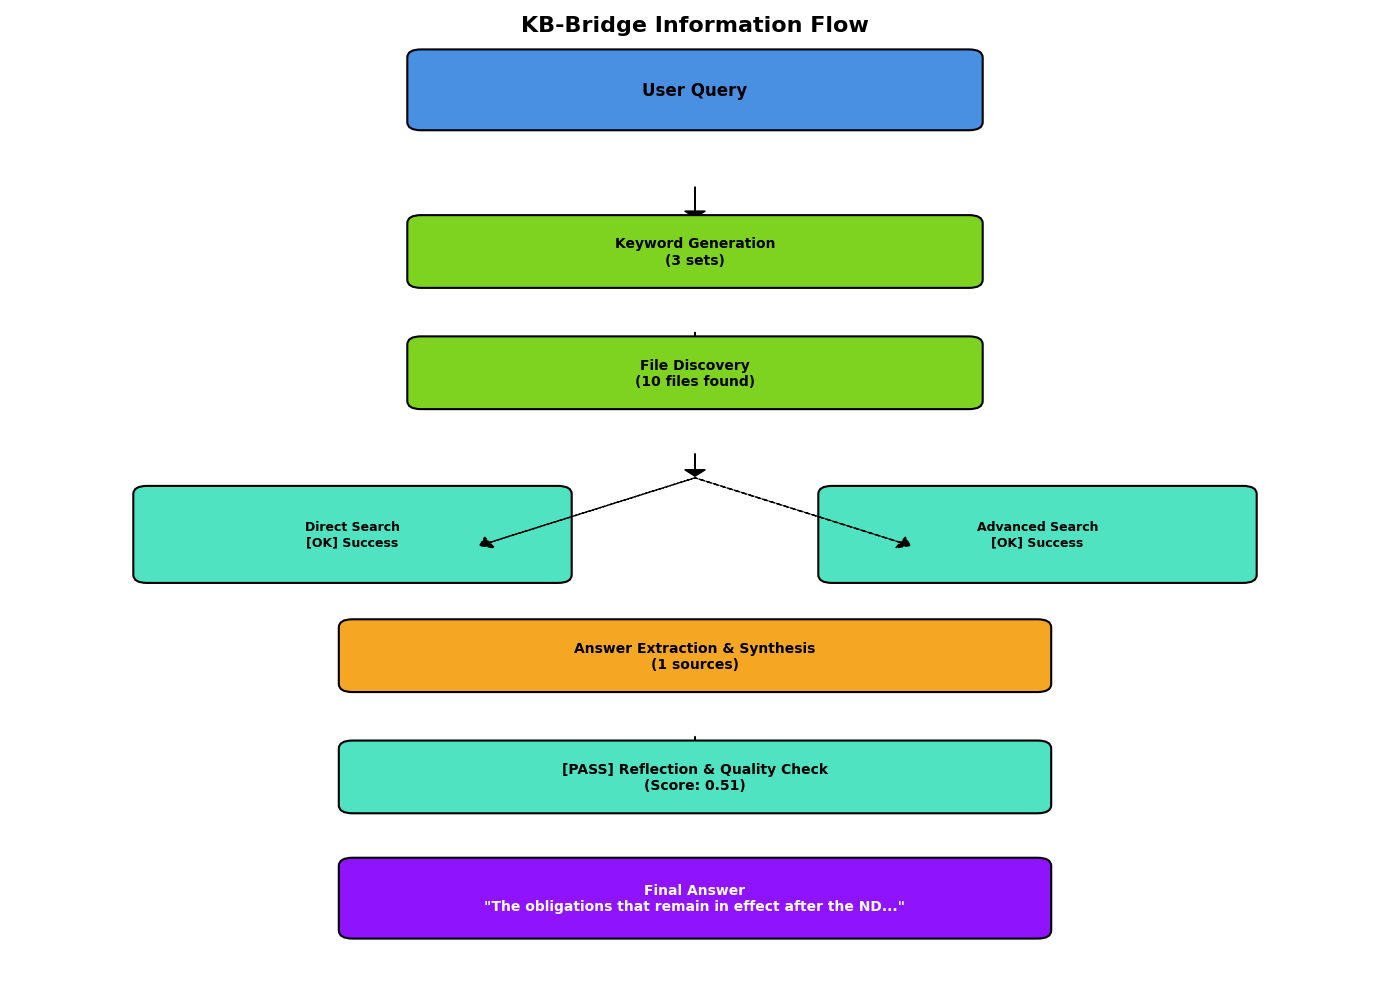


✅ Workflow diagram displayed above


In [24]:
# Import visualization libraries
try:
    import matplotlib.pyplot as plt
    from matplotlib.patches import FancyBboxPatch
    MATPLOTLIB_AVAILABLE = True
except ImportError:
    MATPLOTLIB_AVAILABLE = False
    print("⚠️  matplotlib not available. Install with: pip install matplotlib")
    print("   Visualization will be skipped, but workflow will still run.")


def _is_valid_answer(answer_text):
    """Check if answer text is valid and meaningful."""
    if not answer_text or not answer_text.strip():
        return False
    upper_text = answer_text.strip().upper()
    return upper_text not in ['N/A', 'N/A - NO RELEVANT INFORMATION FOUND', '']


def _get_sources_count(answer_data):
    """Extract sources count from answer data, checking multiple locations."""
    # Try total_sources first
    sources_count = answer_data.get('total_sources', 0)
    if sources_count > 0:
        return sources_count
    
    # Check reflection metadata
    reflection = answer_data.get('reflection', {})
    if isinstance(reflection, dict):
        sources_count = reflection.get('sources_count', 0)
        if sources_count > 0:
            return sources_count
        
        # If quality_score exists, sources were evaluated
        if reflection.get('quality_score', 0) > 0:
            # Try structured_answer
            structured_answer = answer_data.get('structured_answer', {})
            if isinstance(structured_answer, dict):
                structured_sources = structured_answer.get('sources', [])
                if structured_sources:
                    return len(structured_sources)
            # At least one source was used if quality_score exists
            return 1
    
    # If answer exists, at least one source was likely used
    answer_text = answer_data.get('answer', '') or answer_data.get('text_summary', '')
    if _is_valid_answer(answer_text):
        return 1
    
    return 0


def _check_advanced_search_success(answer_data):
    """Determine if advanced search was successful."""
    total_sources = answer_data.get('total_sources', 0)
    reflection = answer_data.get('reflection', {})
    
    if total_sources > 0:
        return True
    
    if isinstance(reflection, dict):
        # If quality_score exists, sources were evaluated
        if reflection.get('quality_score', 0) > 0:
            return True
        # Check explicit sources_count
        if reflection.get('sources_count', 0) > 0:
            return True
    
    # If answer exists, at least one search method succeeded
    answer_text = answer_data.get('answer', '') or answer_data.get('text_summary', '')
    return _is_valid_answer(answer_text)


def visualize_workflow_flow(answer_data, file_data=None, keyword_data=None):
    """
    Visualize the KB-Bridge workflow as a flowchart showing information flow.
    
    Shows:
    - Query input
    - Keyword generation (if used)
    - File discovery
    - Direct search path
    - Advanced search path
    - Answer extraction
    - Reflection/evaluation
    - Final answer output
    
    Args:
        answer_data: Response data from assistant tool
        file_data: Optional file discovery results
        keyword_data: Optional keyword generation results
    """
    if not MATPLOTLIB_AVAILABLE:
        raise ImportError("matplotlib is required for visualization")
    
    fig, ax = plt.subplots(1, 1, figsize=(14, 10))
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 12)
    ax.axis('off')
    
    # Color scheme
    colors = {
        'query': '#4A90E2',
        'process': '#7ED321',
        'search': '#F5A623',
        'success': '#50E3C2',
        'fail': '#D0021B',
        'output': '#9013FE'
    }
    
    y_pos = 11
    x_center = 5
    
    # Helper function to draw boxes
    def draw_box(x, y, width, height, color, text, fontsize=10, bold=False):
        box = FancyBboxPatch((x-width/2, y-height/2), width, height,
                             boxstyle="round,pad=0.1", facecolor=color,
                             edgecolor='black', linewidth=1.5)
        ax.add_patch(box)
        weight = 'bold' if bold else 'normal'
        ax.text(x, y, text, ha='center', va='center',
                fontsize=fontsize, fontweight=weight, color='white' if color == colors['output'] else 'black')
    
    def draw_arrow(x, y, dx, dy, style='-'):
        ax.arrow(x, y, dx, dy, head_width=0.15, head_length=0.08,
                 fc='black', ec='black', linestyle=style)
    
    # 1. Query Input
    draw_box(x_center, y_pos, 4, 0.8, colors['query'], 'User Query', fontsize=12, bold=True)
    y_pos -= 1.5
    draw_arrow(x_center, y_pos + 0.3, 0, -0.3)
    y_pos -= 0.5
    
    # 2. Keyword Generation (if used)
    if keyword_data and keyword_data.get('keyword_sets'):
        kw_count = len(keyword_data.get('keyword_sets', []))
        draw_box(x_center, y_pos, 4, 0.7, colors['process'],
                f'Keyword Generation\n({kw_count} sets)', fontsize=10, bold=True)
        y_pos -= 1.2
        draw_arrow(x_center, y_pos + 0.2, 0, -0.2)
        y_pos -= 0.3
    
    # 3. File Discovery
    if file_data:
        file_count = len(file_data.get('distinct_files', []))
        draw_box(x_center, y_pos, 4, 0.7, colors['process'],
                f'File Discovery\n({file_count} files found)', fontsize=10, bold=True)
        y_pos -= 1.2
        draw_arrow(x_center, y_pos + 0.2, 0, -0.2)
        y_pos -= 0.3
    
    # 4. Search Approaches (Parallel)
    y_search = y_pos - 0.5
    
    # Direct Search
    answer_text = answer_data.get('answer', '') or answer_data.get('text_summary', '')
    direct_success = _is_valid_answer(answer_text)
    direct_color = colors['success'] if direct_success else colors['fail']
    direct_status = "[OK] Success" if direct_success else "[FAIL] No Results"
    draw_box(2.5, y_search, 3, 1, direct_color,
            f'Direct Search\n{direct_status}', fontsize=9, bold=True)
    
    # Advanced Search
    has_advanced = _check_advanced_search_success(answer_data)
    advanced_color = colors['success'] if has_advanced else colors['fail']
    advanced_status = "[OK] Success" if has_advanced else "[PARTIAL] Failed"
    draw_box(7.5, y_search, 3, 1, advanced_color,
            f'Advanced Search\n{advanced_status}', fontsize=9, bold=True)
    
    # Arrows from file discovery to both searches
    draw_arrow(x_center, y_pos + 0.2, -1.5, -0.8, style='--')
    draw_arrow(x_center, y_pos + 0.2, 1.5, -0.8, style='--')
    
    y_pos = y_search - 1.5
    
    # 5. Answer Extraction & Synthesis
    sources_count = _get_sources_count(answer_data)
    draw_box(x_center, y_pos, 5, 0.7, colors['search'],
            f'Answer Extraction & Synthesis\n({sources_count} sources)',
            fontsize=10, bold=True)
    y_pos -= 1.2
    draw_arrow(x_center, y_pos + 0.2, 0, -0.2)
    y_pos -= 0.3
    
    # 6. Reflection/Quality Evaluation (if enabled)
    if 'reflection' in answer_data:
        reflection = answer_data.get('reflection', {})
        quality_score = reflection.get('quality_score', 0)
        passed = reflection.get('passed', False)
        ref_color = colors['success'] if passed else colors['fail']
        status_text = "[PASS]" if passed else "[FAIL]"
        draw_box(x_center, y_pos, 5, 0.7, ref_color,
                f'{status_text} Reflection & Quality Check\n(Score: {quality_score:.2f})',
                fontsize=10, bold=True)
        y_pos -= 1.2
        draw_arrow(x_center, y_pos + 0.2, 0, -0.2)
        y_pos -= 0.3
    
    # 7. Final Answer Output
    if not answer_text or answer_text.strip().upper() in ['N/A', 'N/A - NO RELEVANT INFORMATION FOUND']:
        answer_text = 'No answer found'
    answer_preview = answer_text[:50] + "..." if len(answer_text) > 50 else answer_text
    draw_box(x_center, y_pos, 5, 0.8, colors['output'],
            f'Final Answer\n"{answer_preview}"', fontsize=10, bold=True)
    
    # Title
    ax.text(x_center, 11.8, 'KB-Bridge Information Flow',
            ha='center', va='center', fontsize=16, fontweight='bold')
    
    plt.tight_layout()
    return fig

def _display_reflection_analysis(reflection, answer):
    """Display detailed reflection analysis when quality is low."""
    quality_score = reflection.get("quality_score")
    threshold = reflection.get("threshold", 0.7)
    passed = reflection.get("passed", True)
    
    # Determine analysis type
    if answer == "N/A - No relevant information found":
        title = "🔍 Reflection Analysis: Why No Results Were Found"
    else:
        title = "🔍 Reflection Analysis: Why Quality Score is Low"
    
    print("\n" + "─" * 60)
    print(title)
    print("─" * 60)
    
    if quality_score is not None:
        print(f"\n📊 Quality Assessment:")
        print(f"   Quality Score: {quality_score:.2f} / {threshold:.2f}")
        print(f"   Status: {'✅ Passed' if passed else '❌ Below threshold'}")
        
        # Show confidence level interpretation
        confidence_level = reflection.get("confidence_level", "")
        if confidence_level:
            confidence_map = {
                "high": "✅ High confidence - answer is reliable",
                "medium": "⚠️  Medium confidence - answer may need verification",
                "low": "⚠️  Low confidence - answer quality is below acceptable threshold",
                "very_low": "❌ Very low confidence - answer is likely incorrect or incomplete"
            }
            print(f"   Confidence: {confidence_map.get(confidence_level, confidence_level)}")
    
    # Show detailed feedback
    feedback = reflection.get("feedback", "")
    if feedback:
        print(f"\n💡 Reflection Feedback:")
        print(f"   {feedback}")
    
    # Show detailed scores breakdown
    scores = reflection.get("scores", {})
    if scores:
        print(f"\n📈 Detailed Quality Scores:")
        for metric, score in scores.items():
            print(f"   {metric.capitalize()}: {score:.2f}")
    
    # Show recommendations if available
    recommendation = reflection.get("recommendation", "")
    if recommendation:
        print(f"\n💡 Recommendation:")
        print(f"   {recommendation}")
    
    # Show re-extraction suggestion if available
    if reflection.get("re_extraction_recommended"):
        candidates_count = reflection.get("re_extraction_candidates", 0)
        print(f"\n🔄 Re-extraction Opportunity:")
        print(f"   {candidates_count} candidates have segments but extraction failed.")
        print(f"   Re-extraction with improved parameters may help.")


async def complete_workflow_example(reflection_threshold=0.5):
    """
    Complete workflow example demonstrating how KB-Bridge handles queries
    and uses reflection to evaluate answer quality.
    
    This example shows:
    1. Keyword generation for query expansion
    2. File discovery to find relevant documents
    3. Answer extraction with reflection to evaluate quality
    4. Reflection insights when answer quality is low or no results found
    5. Visual workflow diagram showing information flow
    
    Args:
        reflection_threshold: Quality threshold (0-1). Default 0.5. 
                             Lower values allow lower-quality answers to pass.
                             Set to 0.7 for stricter quality checks.
    
    Note: KB-Bridge uses both "direct" and "advanced" search approaches:
    - Direct search: Searches across all documents (more forgiving, aggregates results)
    - Advanced search: Processes files individually (more precise but stricter)
    
    If advanced search fails for individual files, KB-Bridge automatically falls back
    to direct search results. This is normal behavior - the system uses the best
    available results from either approach.
    """
    async with ClientSession(SERVER_URL) as session:
        query = "What obligations remain in effect after the NDA expires, specifically regarding return or destruction of confidential information and survival of obligations for clinical trial data at University of Michigan?"
        
        print("=" * 60)
        print("🔄 Complete Workflow Example")
        print(f"   Reflection Threshold: {reflection_threshold}")
        print("=" * 60)
        
        # Step 1: Generate keywords
        print("\n1️⃣ Generating keywords...")
        keyword_result = await session.call_tool("keyword_generator", {
            "query": query,
            "max_sets": 3
        })
        keyword_data = json.loads(keyword_result.content[0].text)
        if "keyword_sets" in keyword_data:
            print(f"   ✅ Generated {len(keyword_data['keyword_sets'])} keyword sets")
        
        # Step 2: Discover relevant files
        print("\n2️⃣ Discovering relevant files...")
        file_result = await session.call_tool("file_discover", {
            "query": query,
            "resource_id": RESOURCE_ID,
            "top_k_return": 10
        })
        file_data = json.loads(file_result.content[0].text)
        files = file_data.get("distinct_files", [])
        print(f"   ✅ Found {len(files)} relevant files")
        
        # Step 3: Query assistant with reflection enabled
        print("\n3️⃣ Querying assistant (with reflection and verbose mode)...")
        answer_result = await session.call_tool("assistant", {
            "resource_id": RESOURCE_ID,
            "query": query,
            "custom_instructions": "Provide a comprehensive answer with specific details. Cite sources.",
            "enable_query_rewriting": True,
            "enable_reflection": True,
            "reflection_threshold": reflection_threshold,
            "verbose": True
        })
        answer_data = json.loads(answer_result.content[0].text)
        
        # Display final answer
        print("\n" + "=" * 60)
        print("📤 Final Answer")
        print("=" * 60)
        answer = answer_data.get("answer", answer_data.get("text_summary", "No answer found"))
        print(answer)
        
        # Show reflection insights when quality is low or answer indicates no results
        if "reflection" in answer_data:
            reflection = answer_data.get("reflection", {})
            quality_score = reflection.get("quality_score")
            passed = reflection.get("passed", True)
            
            # Show analysis if quality is low or answer indicates no results
            # Use reflection_threshold instead of hardcoded 0.7
            threshold = reflection.get("threshold", reflection_threshold)
            if not passed or (quality_score is not None and quality_score < threshold) or answer == "N/A - No relevant information found":
                _display_reflection_analysis(reflection, answer)
        
        # Show sources if available
        if "sources" in answer_data and answer_data["sources"]:
            print(f"\n📚 Sources ({len(answer_data['sources'])}):")
            for source in answer_data["sources"][:5]:
                print(f"   • {source.get('title', 'Unknown')}")
        
        # Visualize the workflow flow
        print("\n" + "=" * 60)
        print("📊 Workflow Visualization")
        print("=" * 60)
        print("\nGenerating information flow diagram...")
        print("\n💡 Note: Advanced search may show as 'Failed' even when direct search succeeds.")
        print("   This happens because:")
        print("   - Advanced search processes files individually with per-file top_k limits")
        print("   - Segments might rank differently within files vs. across all files")
        print("   - Direct search aggregates results across all files (more forgiving)")
        print("   - KB-Bridge automatically uses the best results from either approach")
        
        # Generate visualization if matplotlib is available
        if MATPLOTLIB_AVAILABLE:
            try:
                fig = visualize_workflow_flow(answer_data, file_data, keyword_data)
                plt.show()
                print("\n✅ Workflow diagram displayed above")
            except Exception as e:
                print(f"\n⚠️  Could not generate visualization: {e}")
                print("   (This is optional - the workflow still completed successfully)")
        else:
            print("\n⚠️  Visualization skipped (matplotlib not installed)")
            print("   Install with: pip install matplotlib")
            print("\n📋 Text Summary of Workflow:")
            print("   1. User Query → Keyword Generation → File Discovery")
            print("   2. Parallel Search: Direct Search + Advanced Search")
            print("   3. Answer Extraction & Synthesis")
            if 'reflection' in answer_data:
                print("   4. Reflection & Quality Check")
            print("   5. Final Answer Output")

# Run with lower threshold (0.5) so scores like 0.51 will pass and show green
await complete_workflow_example()

# To use stricter threshold, uncomment:
# await complete_workflow_example(reflection_threshold=0.7)


In [25]:
show_logs()


Server Logs (50 of 1000 lines)

ℹ️  2025-11-14 11:42:22,044 - kbbridge.core.orchestration.pipeline - INFO - Answer extracted successfully for file '54c808c1b20e4490b1300ad2ce3b9649.pdf':
ℹ️  2025-11-14 11:42:22,044 - kbbridge.core.orchestration.pipeline - INFO -   Answer length: 1087 chars
ℹ️  2025-11-14 11:42:22,044 - kbbridge.core.orchestration.pipeline - INFO -   Answer preview: The obligations regarding the return or destruction of confidential information after the NDA expires are specified in Clause 5. Either Party must, upon a 30-day written request by the other Party, re...
ℹ️  2025-11-14 11:42:22,044 - kbbridge.core.orchestration.pipeline - INFO -    Combined answer: 1,962 chars (reduction: 88.2%)
ℹ️  2025-11-14 11:42:22,044 - kbbridge.core.orchestration.pipeline - INFO -    Estimated items in combined answer: ~0
ℹ️  2025-11-14 11:42:22,045 - kbbridge.services.assistant_service - INFO - ================================================================================
ℹ️  2025-

## 11. Error Handling

Here's how to handle errors gracefully when working with the KB-Bridge API:


In [26]:
async def error_handling_example():
    """Example of error handling"""
    async with ClientSession(SERVER_URL) as session:
        try:
            result = await session.call_tool("assistant", {
                "resource_id": "invalid-resource-id",
                "query": "test query"
            })
            
            response_data = json.loads(result.content[0].text)
            
            if "error" in response_data:
                print(f"Error occurred: {response_data['error']}")
                print(f"Message: {response_data.get('message', 'No message')}")
            else:
                print("Success:", response_data.get("answer", "No answer"))
                
        except Exception as e:
            print(f"Exception occurred: {type(e).__name__}: {e}")

await error_handling_example()


[11/14/25 11:42:23] INFO     Server log: Executing assistant for query: test query                    ]8;id=490864;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=790444;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Request timeout set to: 300 seconds                          ]8;id=565006;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=784120;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Calling assistant_service...                                 ]8;id=3121;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=156812;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Starting assistant session 1134f320 with query: 'test query' ]8;id=365596;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=782044;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Resource ID: invalid-resource-id                             ]8;id=667030;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=16717;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Verbose mode: False                                          ]8;id=727946;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=920323;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Retrieval backend: dify                                      ]8;id=73521;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=583676;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Credentials status: http***t.ai, data***Mrjl,                ]8;id=376109;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=649523;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             llm_api_url=SET, llm_model=SET                                                        

                    INFO     Server log: All required credentials are present and validated           ]8;id=744760;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=823270;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Creating components...                                       ]8;id=633233;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=827582;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Components created: ['retriever_factory',                    ]8;id=745535;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=524312;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             'file_discover_factory', 'answer_extractor', 'intention_extractor']                   

                    INFO     Server log: Extracting intention for query: 'test query'                 ]8;id=151377;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=984866;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Starting intention extraction for query: 'test query'        ]8;id=176597;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=352159;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Intention extraction result: {'original_query': 'test        ]8;id=349379;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=240937;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\
                             query', 'doc_names': [], 'model_used': 'gpt-4o', 'tool_type':                         
                             'user_intention_extractor', 'success': True, 'updated_query': 'test                   
                             query', 'should_decompose': False, 'sub_queries': [], 'debug_details':                
                             ['DSPy processing successful']}                                                       

                    INFO     Server log: Query unchanged: 'test query'                                ]8;id=700655;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=672680;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Refined query: 'test query'                                  ]8;id=856947;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=490460;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Processing 1 dataset pairs...                                ]8;id=245273;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=697049;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: No custom instructions provided                              ]8;id=933706;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=505364;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: Content Booster: ENABLED (max_boost_keywords=1)              ]8;id=141105;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=64304;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    ERROR    Server log: Dataset processing failed: No resources with files found     ]8;id=402841;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=11609;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

                    INFO     Server log: assistant_service completed successfully                     ]8;id=868377;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py\logging.py]8;;\:]8;id=806583;file:///data/miniconda3/lib/python3.12/site-packages/fastmcp/client/logging.py#40\40]8;;\

Error occurred: No resources with files found
Message: No message


## Summary

This notebook demonstrated the key features of KB-Bridge:

- **Assistant Tool** - Intelligent Q&A with custom instructions and query rewriting  
- **File Discovery** - Find relevant files before querying  
- **Document Filtering** - Search within specific documents  
- **Keyword Generation** - Improve search queries with LLM-generated keywords  
- **Multiple Search Methods** - Hybrid, semantic, keyword, and full-text search  
- **Complete Workflows** - Combine tools for comprehensive knowledge extraction  

## Use Cases

- **Contract Analysis**: Analyze legal documents (see [ContractNLI](https://stanfordnlp.github.io/contract-nli/))
- **Document Q&A**: Answer questions about technical documentation and policies
- **Knowledge Base Search**: Search across large document collections

## Next Steps

- Explore the [full documentation](https://github.com/egpivo/kb-bridge)
- Check out the [test suite](https://github.com/egpivo/kb-bridge/tree/main/tests) for more examples
- Contribute on [GitHub](https://github.com/egpivo/kb-bridge)

## Resources

- **Installation**: `pip install kbbridge`
- **Server**: `python -m kbbridge.server`
- **Documentation**: See README.md in the repository
- **Issues**: [GitHub Issues](https://github.com/egpivo/kb-bridge/issues)

---

*Happy knowledge base searching!*
